## Introduction

Data is ubiquitous, and leveraging historical data for forecasting remains valuable as history often repeats itself. Knowing the title of a book is beneficial, but reading it is far more useful; similarly, data is essential in our analyses.

In this project, I have utilized well-known US stock tickers, including Apple **(AAPL)**, Adobe **(ADBE)**, Amazon **(AMZN)**, Tesla **(TSLA)**, Nvidia **(NVDA)**, and Microsoft **(MSFT)**. The data was sourced from yFinance library in pyhton, a public and easily accessible platform that hosts realistic datasets. And the Financial Statments From Stock Analysis.

This project is structured around five key questions, each addressed in dedicated sections, and The Questions are
:

1.) What was the change in price and volume of each stock over time and their correlation over 2.51 years?

2.) What was the moving averages of the various stocks and the correlation between RSI and the Close Price over 2.51 years?

3.) What is the financial health of each company, and what are the primary metrics to focus on?

4.) How can we predict future stock behavior for each Stock using Time Series Anaylsis?

5.) How accurate are our results by utilizing statistical measures?


**The structure of the report is as follows:**

Pre_Section: Loading the Data

Section 1: Q1 Answer

Section 2: Q2 Answer 

Section 3: Q3 Answer 

Section 4: Q4 Answer

Section 5: Q5 Answer 

Conclusion

## Pre_Section: Loading the Tickers

In [47]:
# Imports

import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from typing import Tuple

# Load the data from the Excel file
AAPL = pd.read_csv("D:/P2_Stocks/AAPL/AAPL.csv")
# Display the data
AAPL.head()


date  close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  23.91                     26.08                          25.58   
1  1/5/2016  23.32                     26.03                          25.49   
2  1/6/2016  22.86                     25.95                          25.39   
3  1/7/2016  21.89                     25.86                          25.25   
4  1/8/2016  22.01                     25.79                          25.12   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      25.72                           25.99   
1                      25.69                           25.94   
2                      25.66                           25.88   
3                      25.62                           25.80   
4                      25.58                           25.72   

   Relative Strength Index 14  Daily_Return     volume  
0                       30.42         0.001  270597600  
1                       29.37        -0.025  223164000  
2                       23.43        -0.020  273829600  
3                       21.41        -0.042  324377600  
4                       26.71         0.005  283192000

In [20]:
ADBE = pd.read_csv("D:/P2_Stocks/ADBE/ADBE.csv")
# Display the data
ADBE.head()

Date  Adj Close  Simple Moving Average_50  \
0  1/4/2016      91.97                     91.36   
1  1/5/2016      92.34                     91.44   
2  1/6/2016      91.02                     91.51   
3  1/7/2016      89.11                     91.51   
4  1/8/2016      87.85                     91.51   

   Exponential Moving Average_50  Simple Moving Average_100  \
0                          90.97                      86.67   
1                          91.02                      86.76   
2                          91.02                      86.82   
3                          90.95                      86.85   
4                          90.83                      86.87   

   Exponential Moving Average_100  Relative Strength Index 14  Daily_Return  \
0                           87.95                       45.68        -0.021   
1                           88.04                       44.22         0.004   
2                           88.10                       34.15        -0.014   
3                           88.12                       32.89        -0.021   
4                           88.11                       36.93        -0.014   

    Volume  
0  2993800  
1  1821300  
2  1674000  
3  2717800  
4  2263400

In [21]:
TSLA = pd.read_csv("D:/P2_Stocks/TSLA/TSLA.csv")
# Display the data
TSLA.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  14.89                     14.91                          15.25   
1  1/5/2016  14.90                     14.93                          15.24   
2  1/6/2016  14.60                     14.94                          15.21   
3  1/7/2016  14.38                     14.94                          15.18   
4  1/8/2016  14.07                     14.94                          15.13   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      15.51                           15.44   
1                      15.50                           15.43   
2                      15.49                           15.42   
3                      15.47                           15.40   
4                      15.44                           15.37   

   Relative Strength Index 14  Daily_Return     Volume  
0                       54.38        -0.069  102406500  
1                       52.22         0.000   47802000  
2                       32.25        -0.020   56686500  
3                       30.65        -0.015   53314500  
4                       29.54        -0.022   54421500

In [22]:
AMZN = pd.read_csv("D:/P2_Stocks/AMZN/AMZN.csv")
# Display the data
AMZN.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  31.85                     32.77                          32.23   
1  1/5/2016  31.69                     32.84                          32.21   
2  1/6/2016  31.63                     32.87                          32.18   
3  1/7/2016  30.40                     32.87                          32.11   
4  1/8/2016  30.35                     32.87                          32.05   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      29.55                            0.93   
1                      29.61                            0.91   
2                      29.66                            0.92   
3                      29.70                            0.96   
4                      29.73                            0.95   

   Relative Strength Index 14  Daily_Return     Volume  
0                       41.34        -0.058  186290000  
1                       39.92        -0.005  116452000  
2                       29.91        -0.002  106584000  
3                       25.29        -0.039  141498000  
4                       26.47        -0.001  110258000

In [23]:
MSFT = pd.read_csv("D:/P2_Stocks/MSFT/MSFT.csv", low_memory=False)
# Display the data
MSFT.head()

Date  Adj Close  Simple Moving Average_50  \
0  1/4/2016      48.52                     48.05   
1  1/5/2016      48.74                     48.18   
2  1/6/2016      47.86                     48.21   
3  1/7/2016      46.19                     48.18   
4  1/8/2016      46.33                     48.16   

   Exponential Moving Average_50  Simple Moving Average_100  \
0                          47.40                      43.75   
1                          47.45                      43.83   
2                          47.47                      43.90   
3                          47.42                      43.95   
4                          47.38                      44.00   

   Exponential Moving Average_100  Relative Strength Index 14  Daily Returns  \
0                           45.16                       47.72         -0.012   
1                           45.23                       49.02          0.005   
2                           45.29                       36.53         -0.018   
3                           45.30                       30.75         -0.035   
4                           45.32                       38.40          0.003   

     Volume  
0  53778000  
1  34079700  
2  39518900  
3  56564900  
4  48754000

In [24]:
NVDA = pd.read_csv("D:/P2_Stocks/NVDA/NVDA.csv")
# Display the data
NVDA.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  0.809                      0.78                           0.78   
1  1/5/2016  0.822                      0.78                           0.78   
2  1/6/2016  0.788                      0.79                           0.78   
3  1/7/2016  0.757                      0.79                           0.78   
4  1/8/2016  0.741                      0.79                           0.78   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                       0.69                            0.71   
1                       0.69                            0.72   
2                       0.69                            0.72   
3                       0.70                            0.72   
4                       0.70                            0.72   

   Relative Strength Index 14  Daily_Return     Volume  
0                       47.80        -0.018  358076000  
1                       49.14         0.016  490272000  
2                       35.91        -0.041  449344000  
3                       31.81        -0.040  645304000  
4                       31.24        -0.021  398472000

In [25]:
ATL= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=0)
# Display the data
ATL.head()

Quarter Ending  Asset to Liability Ratio AAPL  \
0     2019-06-29                       1.427207   
1     2019-09-28                       1.364830   
2     2019-12-28                       1.356574   
3     2020-03-28                       1.324104   
4     2020-06-27                       1.294954   

   Asset to Liability Ratio ADBE  Asset to Liability Ratio AMZN  \
0                       2.043926                       1.383694   
1                       2.029124                       1.396294   
2                       1.973579                       1.380298   
3                       2.014829                       1.418501   
4                       2.094571                       1.399424   

   Asset to Liability Ratio MSFT  Asset to Liability Ratio NVDA  \
0                       1.555459                       3.328452   
1                       1.613445                       3.439948   
2                       1.637629                       3.387791   
3                       1.669800                       2.289906   
4                       1.646445                       2.235043   

   Asset to Liability Ratio TSLA  
0                       1.289257  
1                       1.295579  
2                       1.309554  
3                       1.404706  
4                       1.425394

In [26]:
DTE= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=1)
# Display the data
DTE.head()

Quarter Ending  D/E Ratio AAPL  D/E Ratio ADBE  D/E Ratio AMZN  \
0     2019-06-29            1.12            0.40            1.10   
1     2019-09-28            1.19            0.39            1.05   
2     2019-12-28            1.21            0.45            1.02   
3     2020-03-28            1.40            0.43            0.98   
4     2020-06-27            1.56            0.40            1.03   

   D/E Ratio MSFT  D/E Ratio NVDA  D/E Ratio TSLA  
0            0.77            0.24            2.28  
1            0.72            0.22            2.21  
2            0.70            0.21            2.03  
3            0.65            0.57            1.52  
4            0.60            0.54            1.43

In [27]:
DR= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=2)
# Display the data
DR.head()

Quarter Ending  Debt Ratio AAPL  Debt Ratio ADBE  Debt Ratio AMZN  \
0     2019-06-29         0.336452         0.206283         0.273475   
1     2019-09-28         0.319178         0.199306         0.272997   
2     2019-12-28         0.317928         0.222070         0.271505   
3     2020-03-28         0.341782         0.217424         0.258743   
4     2020-06-27         0.355208         0.210850         0.235630   

   Debt Ratio MSFT  Debt Ratio NVDA  Debt Ratio TSLA  
0         0.305528         0.167310         0.408653  
1         0.298997         0.155534         0.406861  
2         0.280602         0.147387         0.391122  
3         0.288092         0.321579         0.374309  
4         0.293929         0.300675         0.370762

In [28]:
EBITM= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=3)
# Display the data
EBITM.head()

Quarter Ending  EBIT Margin AAPL  EBIT Margin ADBE  EBIT Margin AMZN  \
0     2019-06-29            0.2375            0.3088            0.0515   
1     2019-09-28            0.2645            0.3319            0.0432   
2     2019-12-28            0.2908            0.3080            0.0516   
3     2020-03-28            0.2382            0.3286            0.0488   
4     2020-06-27            0.2318            0.3374            0.0746   

   EBIT Margin MSFT  EBIT Margin NVDA  EBIT Margin TSLA  
0            0.3934            0.2400           -0.0342  
1            0.4031            0.3225            0.0562  
2            0.3994            0.3314            0.0429  
3            0.3843            0.3266            0.0312  
4            0.3709            0.1715            0.0489

In [29]:
FCFM= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=4)
# Display the data
FCFM.head()

Quarter Ending  Free Cash Flow Margin AAPL  Free Cash Flow Margin ADBE  \
0     2019-06-29                      0.1791                      0.2939   
1     2019-09-28                      0.2675                      0.4285   
2     2019-12-28                      0.3094                      0.3983   
3     2020-03-28                      0.1965                      0.3478   
4     2020-06-27                      0.2464                      0.4062   

   Free Cash Flow Margin AMZN  Free Cash Flow Margin MSFT  \
0                      0.1021                      0.3576   
1                      0.0644                      0.3156   
2                      0.1798                      0.1933   
3                     -0.0313                      0.3923   
4                      0.1574                      0.3662   

   Free Cash Flow Margin NVDA  Free Cash Flow Margin TSLA  
0                      0.3191                      0.0939  
1                      0.5100                      0.0549  
2                      0.4251                      0.1322  
3                      0.2448                     -0.1539  
4                      0.3492                      0.0659

In [30]:
FCFPS= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=5)
# Display the data
FCFPS.head()

Quarter Ending  Free Cash Flow Per Share AAPL  \
0     2019-06-29                           0.53   
1     2019-09-28                           0.95   
2     2019-12-28                           1.61   
3     2020-03-28                           0.66   
4     2020-06-27                           0.85   

   Free Cash Flow Per Share ADBE  Free Cash Flow Per Share AMZN  \
0                           1.71                           0.66   
1                           2.65                           0.46   
2                           2.55                           1.58   
3                           2.26                          -0.24   
4                           2.73                           1.40   

   Free Cash Flow Per Share MSFT  Free Cash Flow Per Share NVDA  \
0                           1.57                           0.03   
1                           1.37                           0.06   
2                           0.94                           0.05   
3                           1.81                           0.03   
4                           1.84                           0.06   

   Free Cash Flow Per Share TSLA  
0                           0.22  
1                           0.13  
2                           0.36  
3                          -0.34  
4                           0.14

In [31]:
PBR= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=6)
# Display the data
PBR.head()

Quarter Ending  P/B Ratio AAPL  P/B Ratio ADBE  P/B Ratio AMZN  \
0     2019-06-29            9.04           13.50           17.60   
1     2019-09-28           10.52           14.20           15.20   
2     2019-12-28           13.89           15.90           14.81   
3     2020-03-28           13.40           17.09           14.88   
4     2020-06-27           20.61           21.17           18.72   

   P/B Ratio MSFT  P/B Ratio NVDA  P/B Ratio TSLA  
0            9.56           10.42        6.930233  
1            9.58           11.12        7.137778  
2           10.48           12.52       11.383673  
3           10.08           13.66       10.458084  
4           12.59           18.20       20.336158

In [33]:
ROE= pd.read_excel("D:/python/financial_ratios.xlsx",sheet_name=8)
# Display the data
ROE.head()

Quarter Ending  ROE AAPL  ROE ADBE  ROE AMZN  ROE MSFT  ROE NVDA  ROE TSLA
0     2019-06-29      0.10      0.08      0.05      0.13      0.05     -0.07
1     2019-09-28      0.15      0.08      0.04      0.10      0.08      0.02
2     2019-12-28      0.25      0.09      0.05      0.11      0.08      0.02
3     2020-03-28      0.14      0.10      0.04      0.09      0.07      0.00
4     2020-06-27      0.16      0.08      0.07      0.09      0.04      0.01

## Section 1: Q1 Answer

### 1.) What was the change in price and volume of each stock over time and their correlation over 2.51 years?

##### **VI. Definitions:**

##### Close Price:
*Definition*: The close price is the final price at which a security is traded on a given trading day.

*Usage*: It represents the **last transaction** price before the market closes.

*Significance*: Investors and analysts use the close price to **assess the daily performance** of a security and make trading decisions.


##### Adjusted Close Price:

Definition: The adjusted close price is the close price adjusted for any corporate actions that occurred before the next trading day.

Adjustments Include:

*Dividends*: Cash dividends paid out to shareholders are accounted for. The stock price typically drops by the dividend amount on the ex-dividend date.

*Stock Splits*: If a company splits its stock, increasing the number of shares while reducing the price per share proportionally, the adjusted close price reflects this change.

Other Corporate Actions: Such as *spin-offs*.

##### Trading volume:
it refers to the total number of shares or contracts traded for a specific security during a given period. This metric can be measured for different time frames, such as a single trading day, a week, a month, or any other period. Trading volume is a crucial indicator in financial markets because it provides insight into the activity and liquidity of a security.


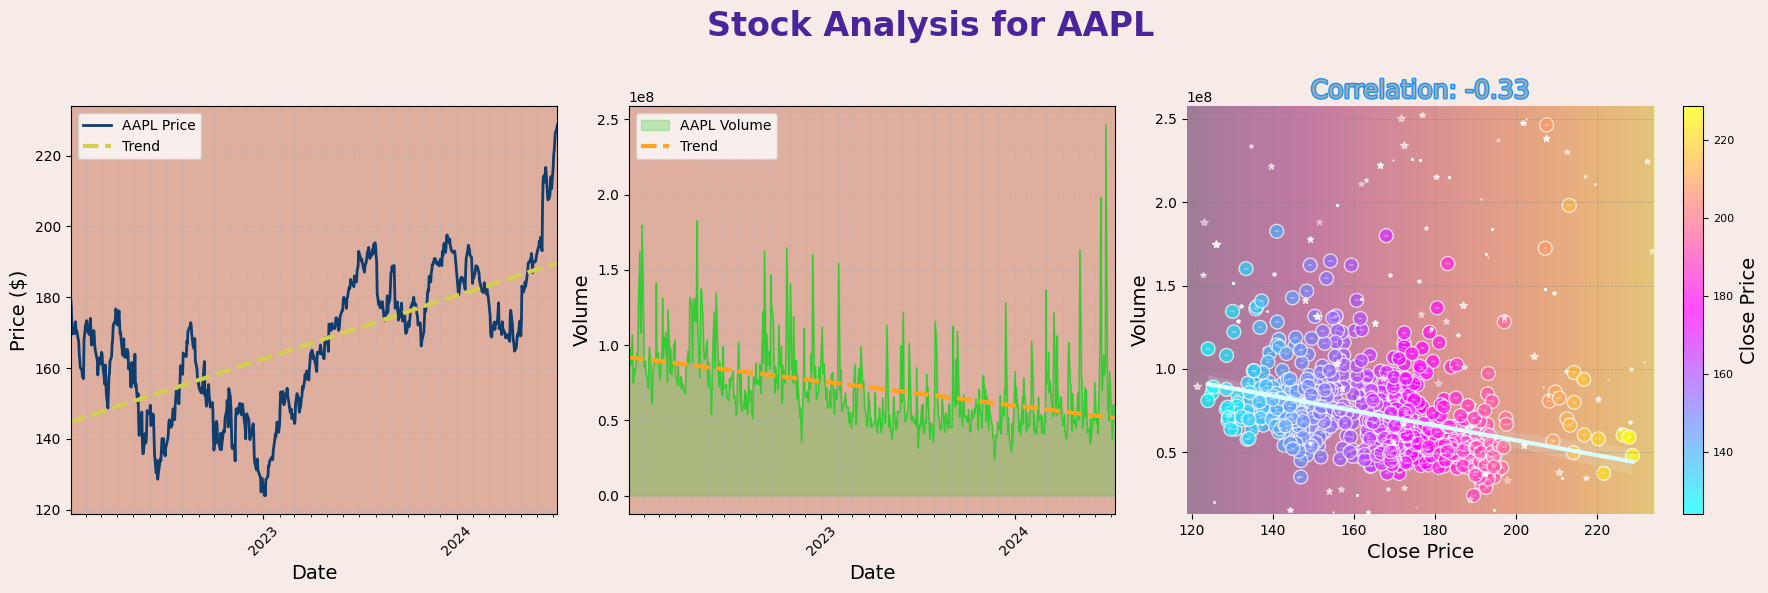

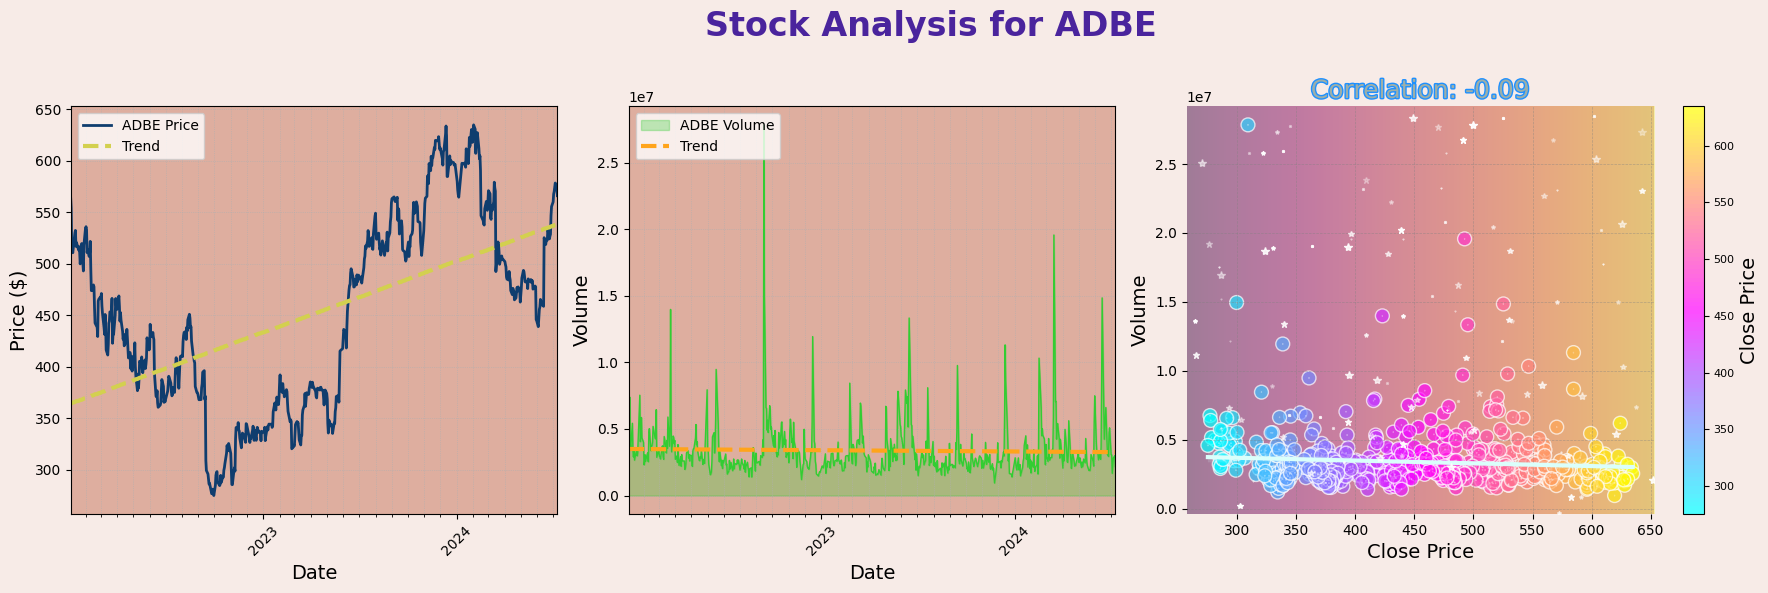

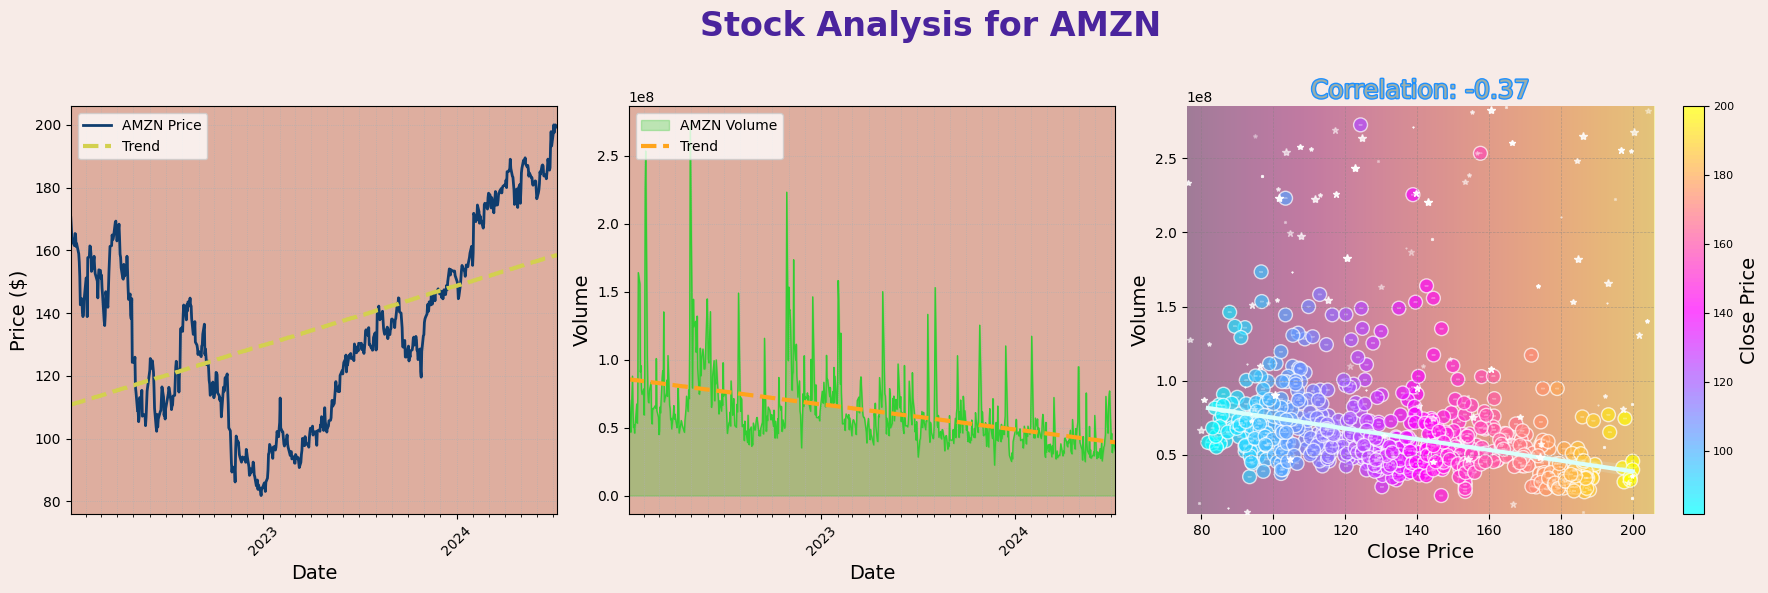

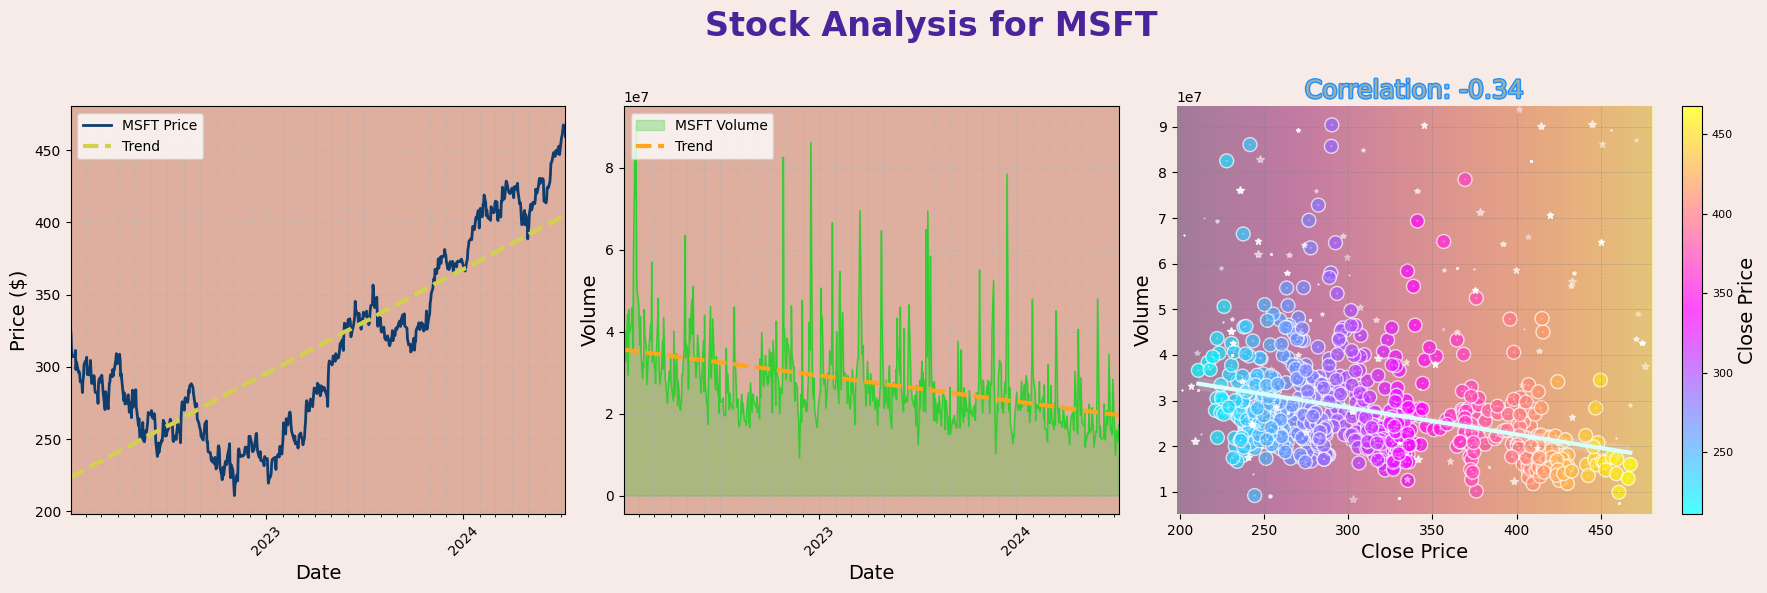

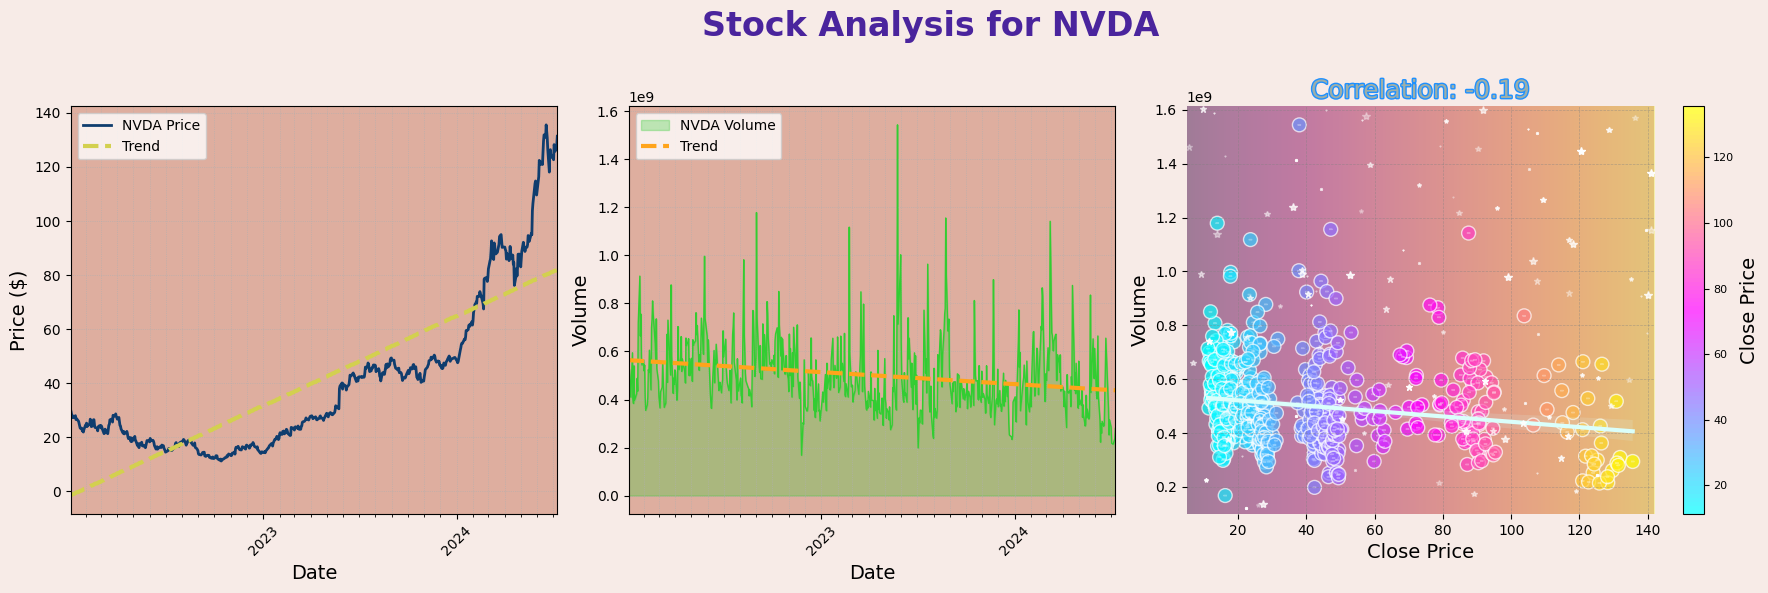

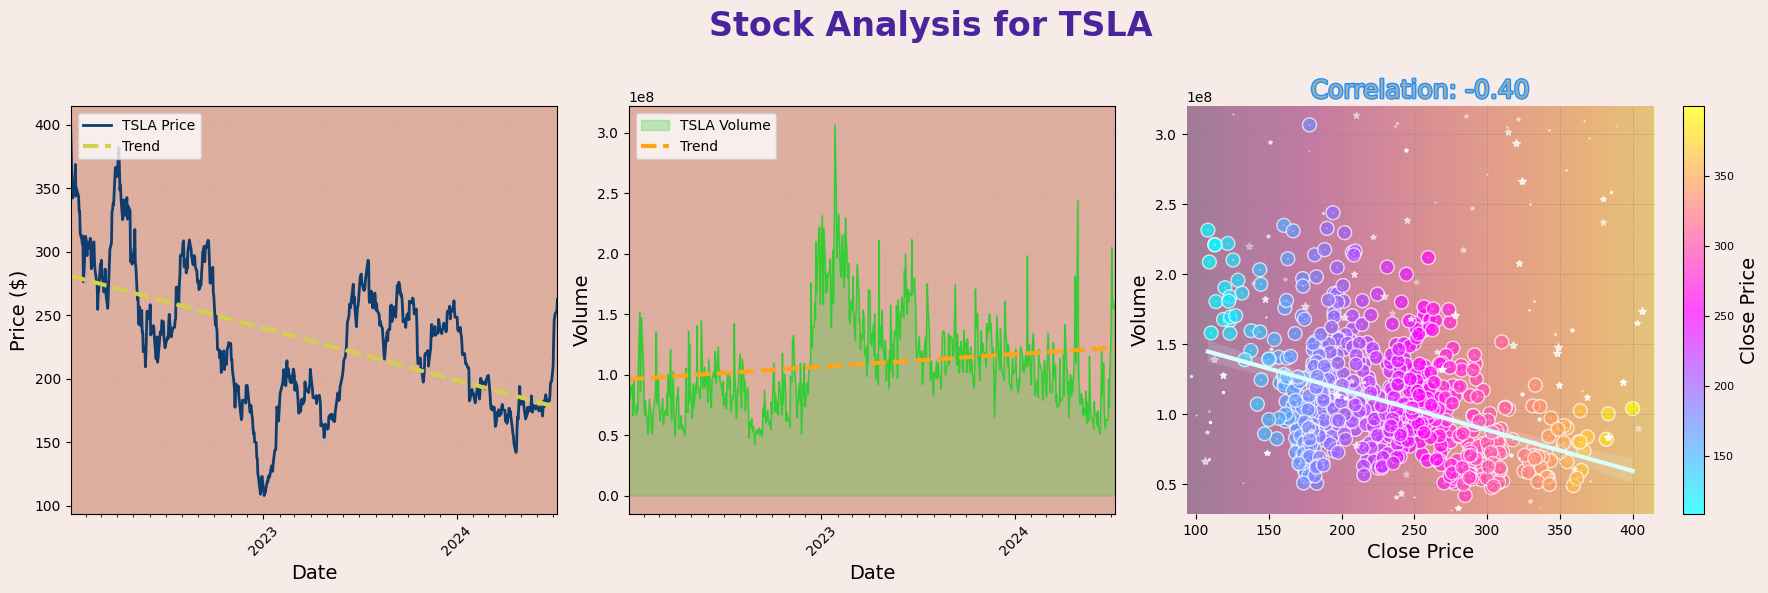

In [34]:
def get_column_names(file_path):
    df = pd.read_csv(file_path, nrows=5)
    date_col = next((col for col in df.columns if 'date' in col.lower()), None)
    price_col = next((col for col in df.columns if 'close' in col.lower() or 'price' in col.lower()), None)
    volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
    if not all([date_col, price_col, volume_col]):
        print(f"Warning: Could not identify all required columns in {file_path}")
        print(f"Available columns: {df.columns.tolist()}")
    return date_col, price_col, volume_col

def plot_individual_trend_and_volume_graphs(file_paths, tickers):
    for ticker, file_path in zip(tickers, file_paths):
        date_column, price_column, volume_column = get_column_names(file_path)
        
        if not all([date_column, price_column, volume_column]):
            print(f"Skipping {ticker} due to missing column information")
            continue
        
        df = pd.read_csv(file_path, parse_dates=[date_column], low_memory=False)
        df = df.dropna(subset=[date_column, price_column, volume_column])
        df = df.sort_values(by=date_column)
        
        # Plot stock price, volume, and correlation
        fig = plt.figure(figsize=(18, 6), dpi=100)
        gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])
        
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[0, 2])
        
        # Plot stock price
        ax1.plot(df[date_column], df[price_column], label=f'{ticker} Price', color='#0F3D6E', linewidth=2)
        x = np.arange(len(df))
        y = df[price_column]
        slope, intercept, _, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax1.plot(df[date_column], line, color='#D3D04F', linestyle='--', linewidth=3, label='Trend')
        
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_minor_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax1.tick_params(axis='x', rotation=45, which='major', labelcolor='black')
        ax1.set_xlim(left=df[date_column].min(), right=df[date_column].max())
        ax1.grid(True, which='both', linestyle=':', linewidth=0.5)
        ax1.legend(fontsize=10, loc='upper left', labelcolor='black', prop={'size': 10})
        
        ax1.set_xlabel('Date', fontsize=14, color='black')
        ax1.set_ylabel('Price ($)', fontsize=14, color='black')
        
        fig.suptitle(f'Stock Analysis for {ticker}', fontsize=24, fontweight='bold', color='#4A249D', x=0.52)
        
        # Plot trading volume
        ax2.fill_between(df[date_column], df[volume_column], color='#32cd32', alpha=0.3, label=f'{ticker} Volume')
        ax2.plot(df[date_column], df[volume_column], color='#32cd32', linewidth=1)
        y = df[volume_column]
        slope, intercept, _, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax2.plot(df[date_column], line, color='#FFA41B', linestyle='--', linewidth=3, label='Trend')
        
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_minor_locator(mdates.MonthLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax2.tick_params(axis='x', rotation=45, which='major', labelcolor='black')
        ax2.set_xlim(left=df[date_column].min(), right=df[date_column].max())
        ax2.grid(True, which='both', linestyle=':', linewidth=0.5)
        ax2.legend(fontsize=10, loc='upper left', labelcolor='black', prop={'size': 10})
        
        ax2.set_xlabel('Date', fontsize=14, color='black')
        ax2.set_ylabel('Volume', fontsize=14, color='black')
        
        # Calculate correlation
        correlation, p_value = stats.pearsonr(df[price_column], df[volume_column])
        
        # Create a custom colormap
        colors = ["#00FFFF", "#FF00FF", "#FFFF00"]
        n_bins = 100
        cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

        # Create the scatter plot
        scatter = ax3.scatter(df[price_column], df[volume_column], s=100, c=df[price_column], cmap=cmap, alpha=0.7, edgecolors='white')

        # Add a trend line
        sns.regplot(data=df, x=price_column, y=volume_column, ax=ax3, scatter=False, color='#DAFFFB', line_kws={'linewidth': 3})

        # Customize the plot
        title = ax3.set_title(f'Correlation: {correlation:.2f}', fontsize=18, color='#9CAFAA')
        title.set_path_effects([withStroke(linewidth=2, foreground='#1e90ff')])
        ax3.set_xlabel('Close Price', fontsize=14, color='black')
        ax3.set_ylabel('Volume', fontsize=14, color='black')

        # Add a colorful background gradient
        gradient = np.linspace(0, 1, 256).reshape(1, -1)
        ax3.imshow(gradient, extent=[ax3.get_xlim()[0], ax3.get_xlim()[1], ax3.get_ylim()[0], ax3.get_ylim()[1]], 
                   aspect='auto', alpha=0.3, cmap='plasma')

        # Add grid lines
        ax3.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

        # Add a shiny effect
        for spine in ax3.spines.values():
            spine.set_visible(False)

        # Add glowing effect to data points
        for i in range(len(df)):
            ax3.add_artist(plt.Circle((df[price_column][i], df[volume_column][i]), 0.5, color='white', alpha=0.3))

        # Add some sparkles
        for _ in range(100):
            x = np.random.uniform(ax3.get_xlim()[0], ax3.get_xlim()[1])
            y = np.random.uniform(ax3.get_ylim()[0], ax3.get_ylim()[1])
            ax3.plot(x, y, 'w*', markersize=np.random.randint(1, 7), alpha=np.random.uniform(0.3, 1))

        # Add a colorbar
        cbar = plt.colorbar(scatter, ax=ax3)
        cbar.set_label('Close Price', fontsize=14, color='black')
        cbar.ax.tick_params(labelsize=8, colors='black')

        # Set background color for axes
        ax1.set_facecolor('#deae9f')
        ax2.set_facecolor('#deae9f')
        ax3.set_facecolor('#deae9f')

        # Set the background color for the figure
        fig.patch.set_facecolor('#f7ebe7')
        plt.tight_layout(rect=[0, 0, 1, 0.97])

        # Save figures
        plt.savefig(f'{ticker}_price_volume_correlation_analysis.svg', format='svg', bbox_inches='tight')
        plt.show()

# Our stock data
stocks = {
    "AAPL": "D:/P2_Stocks/AAPL/AAPL_2.csv",
    "ADBE": "D:/P2_Stocks/ADBE/ADBE_2.csv",
    "AMZN": "D:/P2_Stocks/AMZN/AMZN_2.csv",
    "MSFT": "D:/P2_Stocks/MSFT/MSFT_2.csv",
    "NVDA": "D:/P2_Stocks/NVDA/NVDA_2.csv",
    "TSLA": "D:/P2_Stocks/TSLA/TSLA_2.csv"
}

plot_individual_trend_and_volume_graphs(
    file_paths=list(stocks.values()),
    tickers=list(stocks.keys())
)

To assess market and stock liquidity effectively and ensure our calculations and results are upon accurate analysis, it is crucial to consider the correlation between price and volume. A high correlation between these factors can provide valuable insights into market sentiment and liquidity. Volume serves as a strong indicator of the strength behind price movements.

### **Conclusion** 

You may have wondered about the benefits of visualizing trading volume and how it connects with the closing price. Let's discuss some insights, which, while not universally true, are often observed.

We could conclude ***some scenarios***:

##### **Price Increase with Decreasing Volume (-ne Correlation)**:

This might be a **warning sign** of a potential reversal. If the price is rising but the volume is decreasing, it suggests that **fewer investors are supporting the price increase**, indicating potential weakness.

**ADBE=>** -0.09: Least negative, indicating a very weak negative relationship.

**NVDA=>** -0.19: Weak negative relationship.

**AAPL=>** -0.33: Weak to moderate negative relationship.

**MSFT=>** -0.34: Moderate negative relationship.

**AMZN=>** -0.37: Moderate negative relationship.

Almost all the supporting scenarios are not by chance, as these are well-known companies globally, trusted by many investors.
_______________________
##### **Price Decrease with Increasing Volume (-ne Correlation)**:

This indicates **strong selling interest** and can confirm a downtrend. High volume on price decreases suggests that the price movement is driven by significant selling pressure.

You may wonder why the price decreases in this scenario. It is due to the relationship between supply and demand. When investors have many shares they are willing to sell but there are not enough buyers, supply exceeds demand, leading to a decrease in price.

**TSLA=>** -0.40: Most negative, indicating a moderate negative relationship.

#### Non-Needed Scenarios (Feel Free to Skip Them)

##### **Price Increase with Increasing Volume (+ne Correlation)**:

This indicates **strong buying interest** and can confirm an uptrend. High volume on price increases suggests that the price movement is supported by strong market participation.

***No one under this scenario***

______________
##### **Price Decrease with Decreasing Volume (+ne Correlation)**:

This can indicate a **lack of conviction** in the downtrend. If the price is falling but the volume is decreasing, it suggests that fewer investors are participating in the sell-off, indicating potential stabilization.

To clarify further: When a stock’s price is falling but the volume is also decreasing, it suggests that the intense selling pressure is diminishing. Fewer investors are participating in the sell-off, meaning that the downward movement is not strongly supported by a large number of sellers. As a result, the stock might be traded at a discount, and other investors may hold onto the stock in anticipation of a potential reversal or due to emotional biases.

***No one under this scenario***

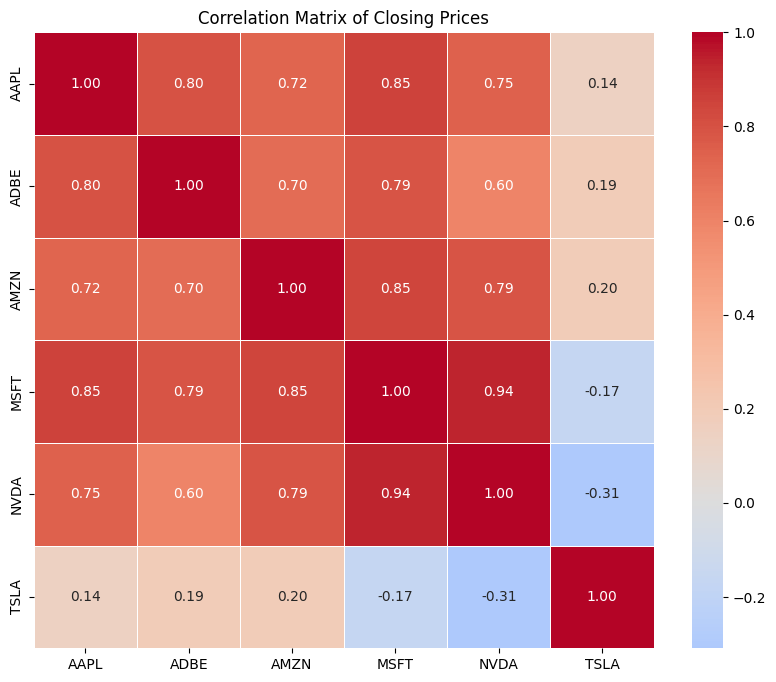

<Figure size 640x480 with 0 Axes>

In [35]:
# Load the CSV files
aapl = pd.read_csv('D:/P2_Stocks/AAPL/AAPL_2.csv')
adbe = pd.read_csv('D:/P2_Stocks/ADBE/ADBE_2.csv')
amzn = pd.read_csv('D:/P2_Stocks/AMZN/AMZN_2.csv')
msft = pd.read_csv('D:/P2_Stocks/MSFT/MSFT_2.csv')
nvda = pd.read_csv('D:/P2_Stocks/NVDA/NVDA_2.csv')
tsla = pd.read_csv('D:/P2_Stocks/TSLA/TSLA_2.csv')

# Rename the columns to have consistent names
aapl_close = aapl.rename(columns={'date': 'Date', 'close': 'AAPL'})[['Date', 'AAPL']]
adbe_close = adbe.rename(columns={'Date': 'Date', 'Adj Close': 'ADBE'})[['Date', 'ADBE']]
amzn_close = amzn.rename(columns={'Date': 'Date', 'Close': 'AMZN'})[['Date', 'AMZN']]
msft_close = msft.rename(columns={'Date': 'Date', 'Adj Close': 'MSFT'})[['Date', 'MSFT']]
nvda_close = nvda.rename(columns={'Date': 'Date', 'Close': 'NVDA'})[['Date', 'NVDA']]
tsla_close = tsla.rename(columns={'Date': 'Date', 'Close': 'TSLA'})[['Date', 'TSLA']]

# Merge the dataframes on the Date column
merged_data = aapl_close.merge(adbe_close, on='Date').merge(amzn_close, on='Date').merge(msft_close, on='Date').merge(nvda_close, on='Date').merge(tsla_close, on='Date')

# Calculate the correlation matrix
correlation_matrix = merged_data.drop(columns=['Date']).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Closing Prices')

# Set background color for the heatmap
plt.gca().set_facecolor('black')  # Set background color for the plot area
plt.show()

# Optional: Save the heatmap to a file
plt.savefig('correlation_matrix_heatmap.png')


The last graph was created for hedging purposes and portfolio management. It provides insights into managing risk and optimizing the portfolio's performance by demonstrating the relationship stock prices between each Ticker.

## Section 2: Q2 Answer

### 2.) What was the moving averages of the various stocks and the correlation between RSI and the Close Price over 2.51 years?

After analzying and identifying the trends for the stock price and its volume for each Ticker.

Now we want to do the same but with SMA,EMA and RSI to see how the stock price average trend over the Stock's life.

#### ***What is the difference between SMA and EMA?***

**Simple Moving Average (SMA):**

Definition: SMA smooths out price data by creating an average price over a specific number of periods. It assigns equal weight to all the prices in the period.
Trend Indication: A rising SMA indicates an uptrend, while a falling SMA indicates a downtrend.
Lagging Indicator: Due to its equal weighting, SMA tends to lag more compared to EMA.

**Exponential Moving Average (EMA):**

Definition: EMA gives more weight to recent prices, making it more responsive to new information compared to the SMA.

Trend Indication: Similar to SMA, but it reacts more quickly to price changes due to its weighting formula.

Lagging Indicator: EMA lags less than SMA, making it more sensitive to recent price movements.

Importance of Analyzing SMA and EMA => By analyzing the movements of SMA and EMA, you can better understand the stock price trends over the stock's life. The SMA provides a smoother, long-term perspective, while the EMA offers a more immediate reaction to recent price changes, allowing for timely trading decisions.*(But in this analysis they are all closer to each other)*

**Relative Strength Index (RSI):**

RSI measures the speed and change of price movements, oscillating between 0 and 100:

Overbought Condition: An RSI above 70 ,this indicates that the asset has been bought aggressively, and its price may be overextended to the upside., suggesting a **potential sell opportunity**.

Oversold Condition: An RSI below 30 indicates oversold conditions,this indicates that the asset has been sold aggressively, and its price may be undervalued suggesting a **potential buy opportunity**.

**Comprehensive Analysis Approach**
Below we will an interactin of  Price,SMA_50, EMA_50, and RSI_14 together from 2022 to 2024, you can get a comprehensive view of the stock's trend, momentum, and potential reversal points. 

This multi-faceted approach enhances the reliability of trading signals and helps make more informed investment decisions.

So Let's See:

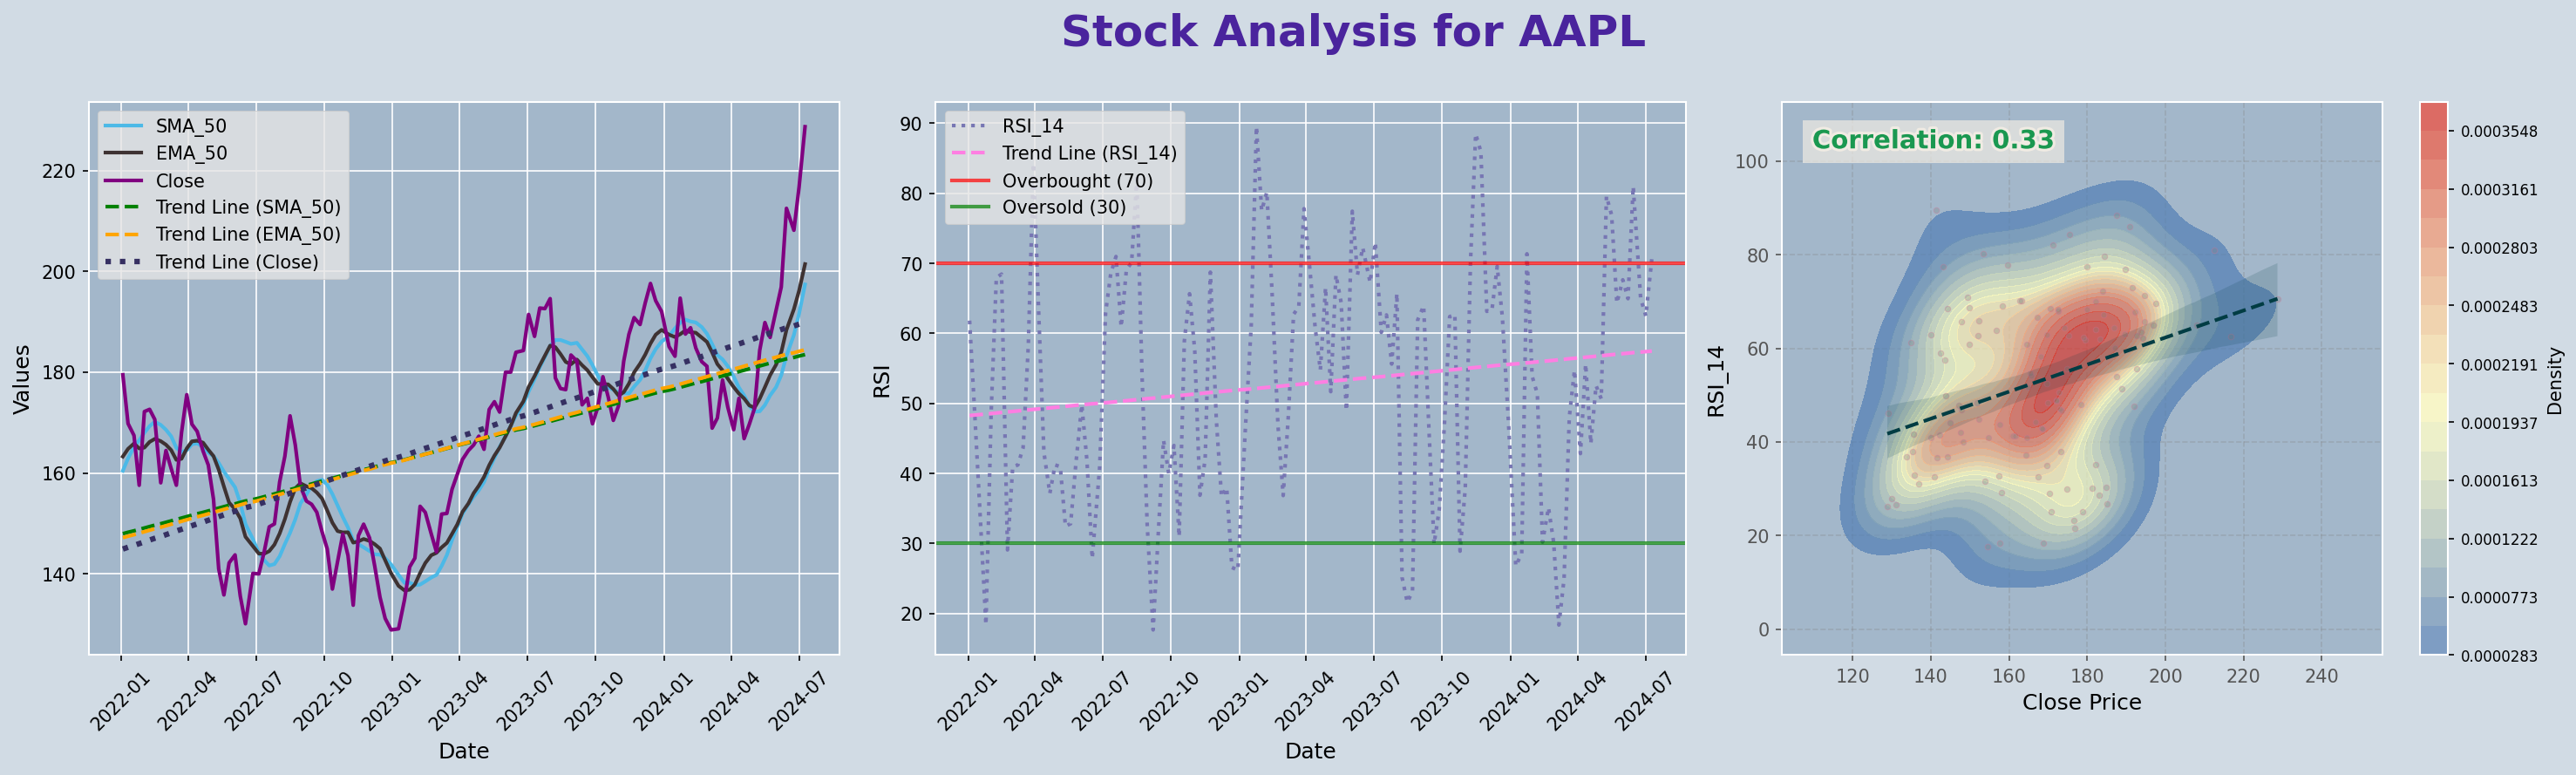

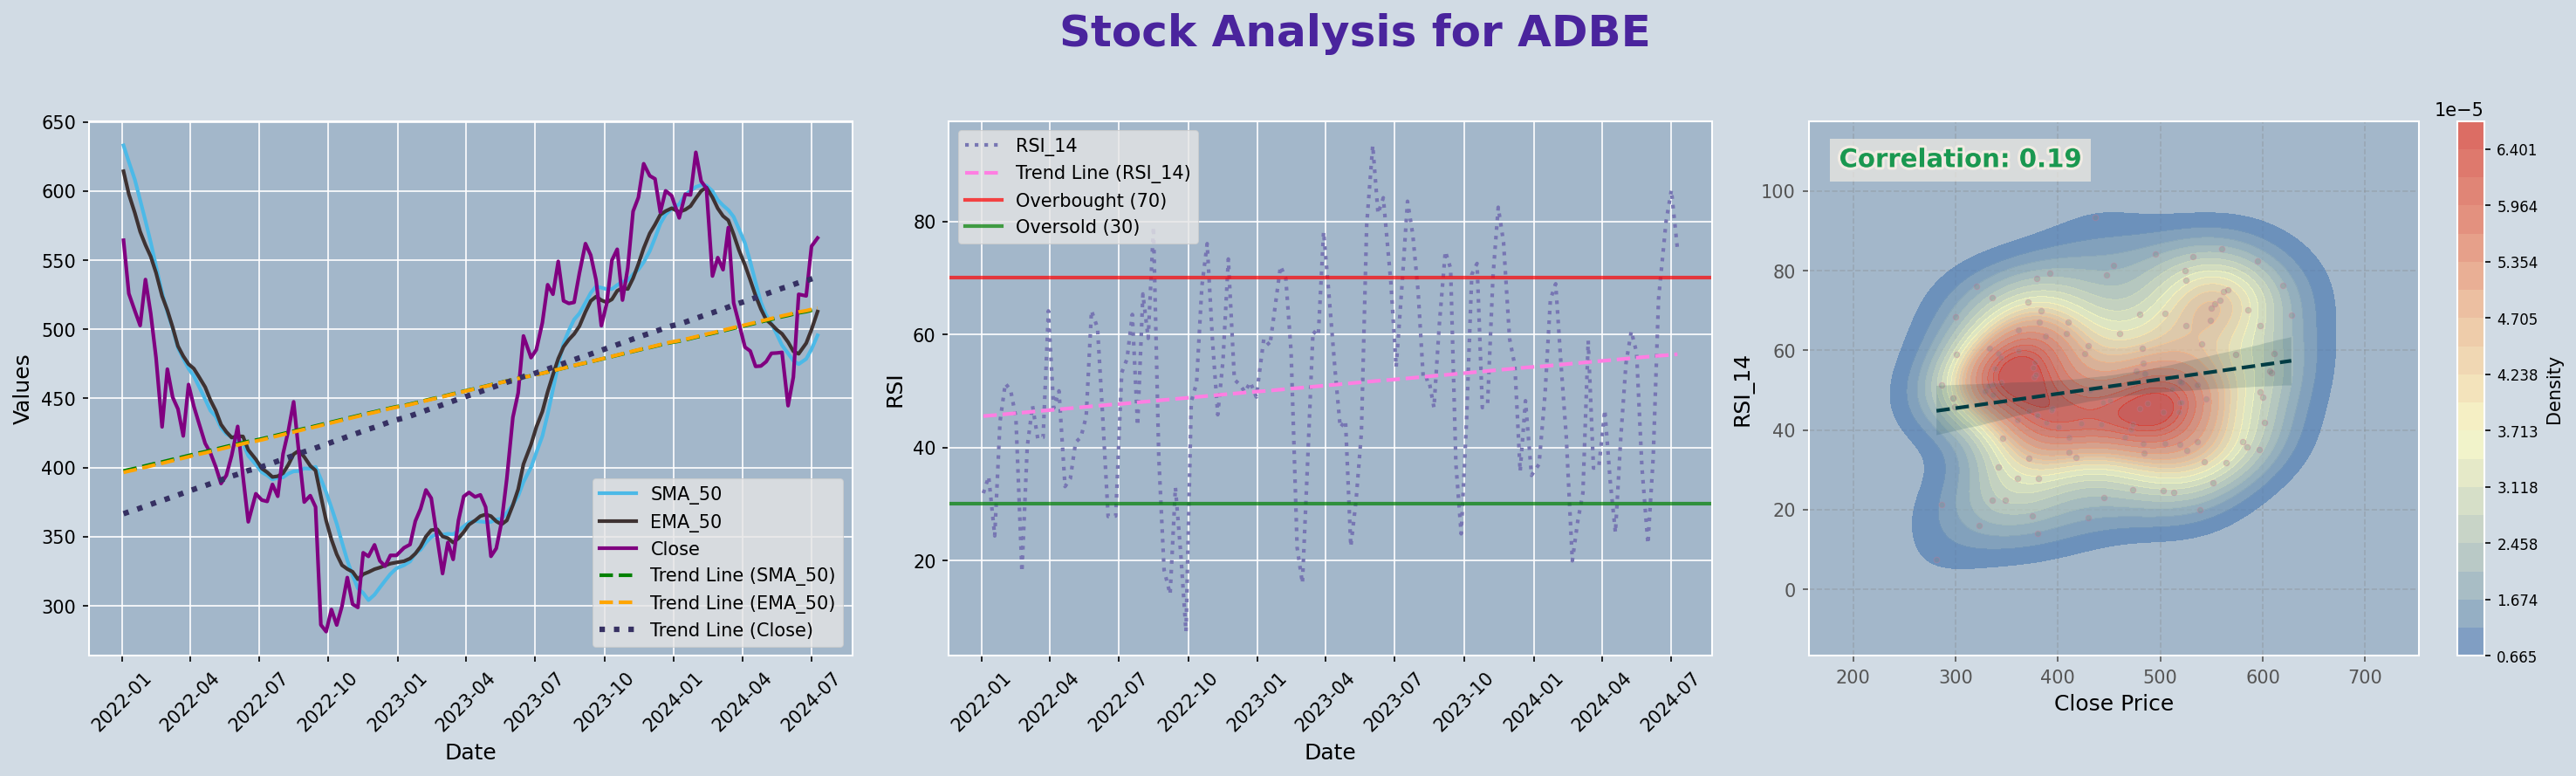

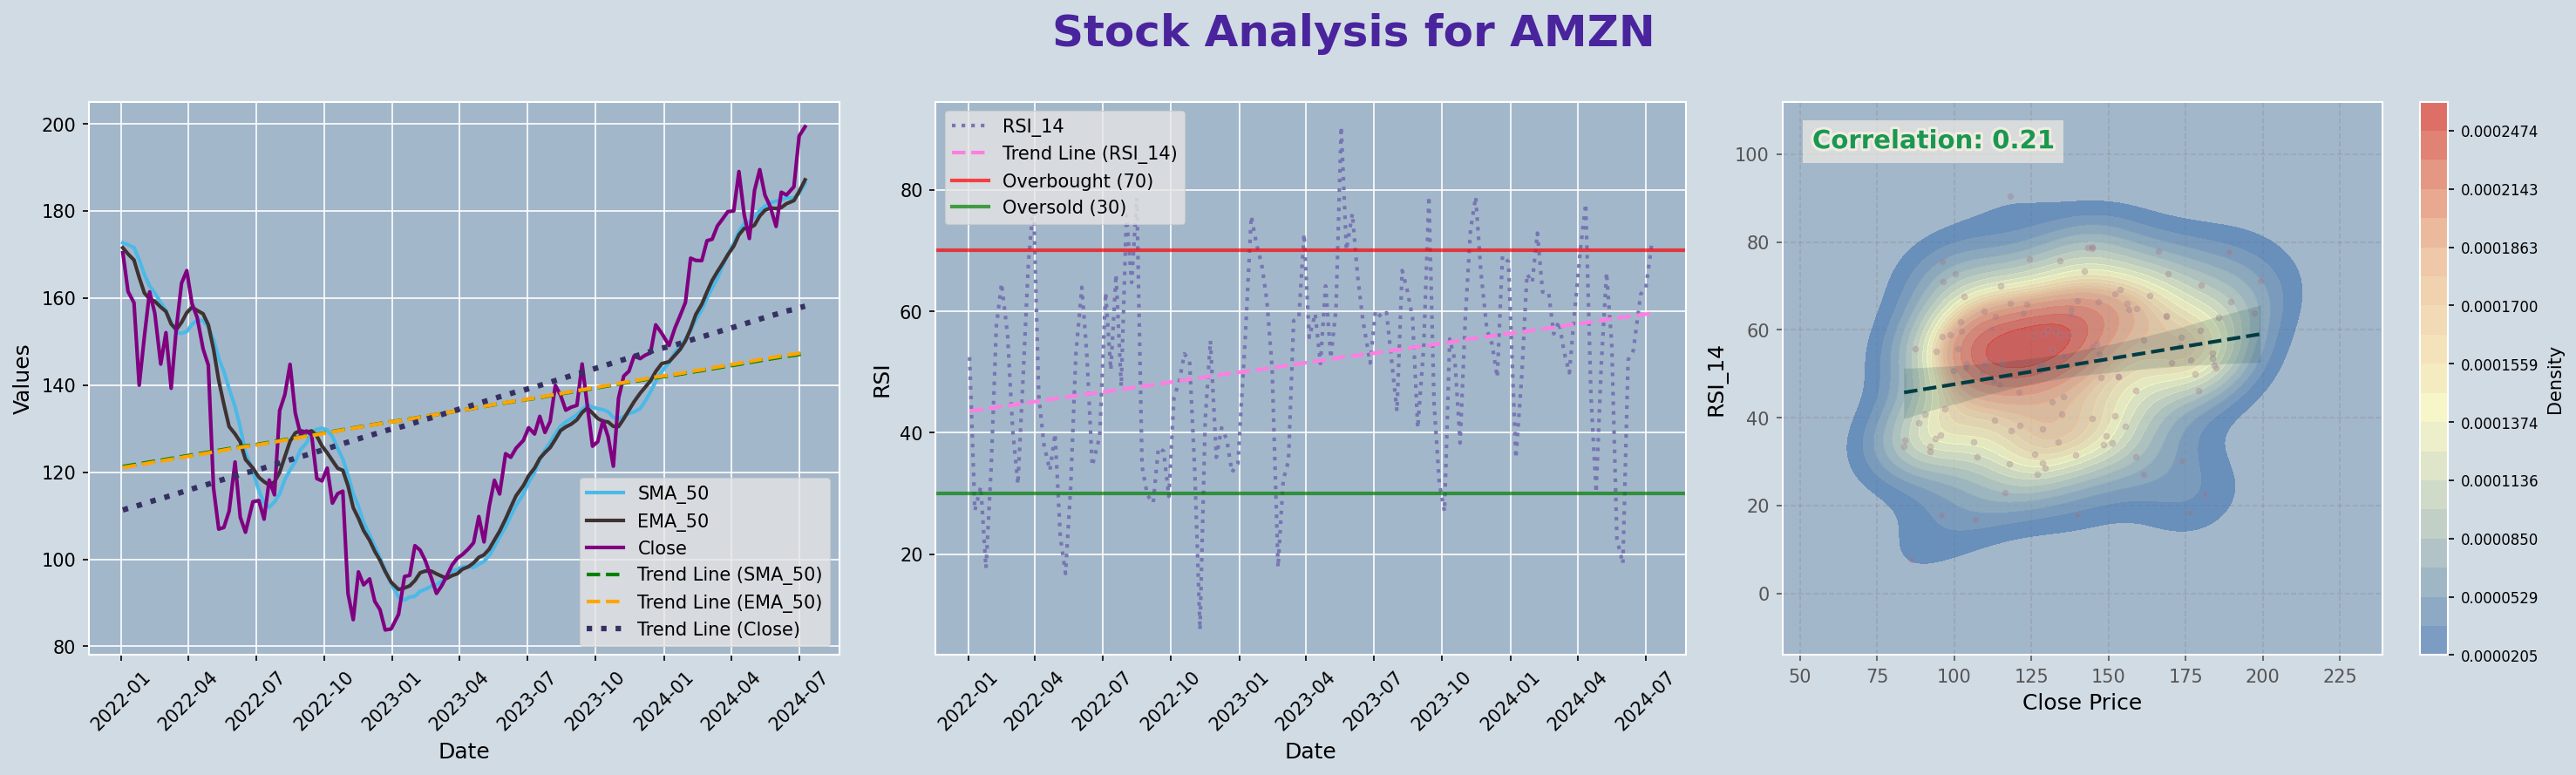

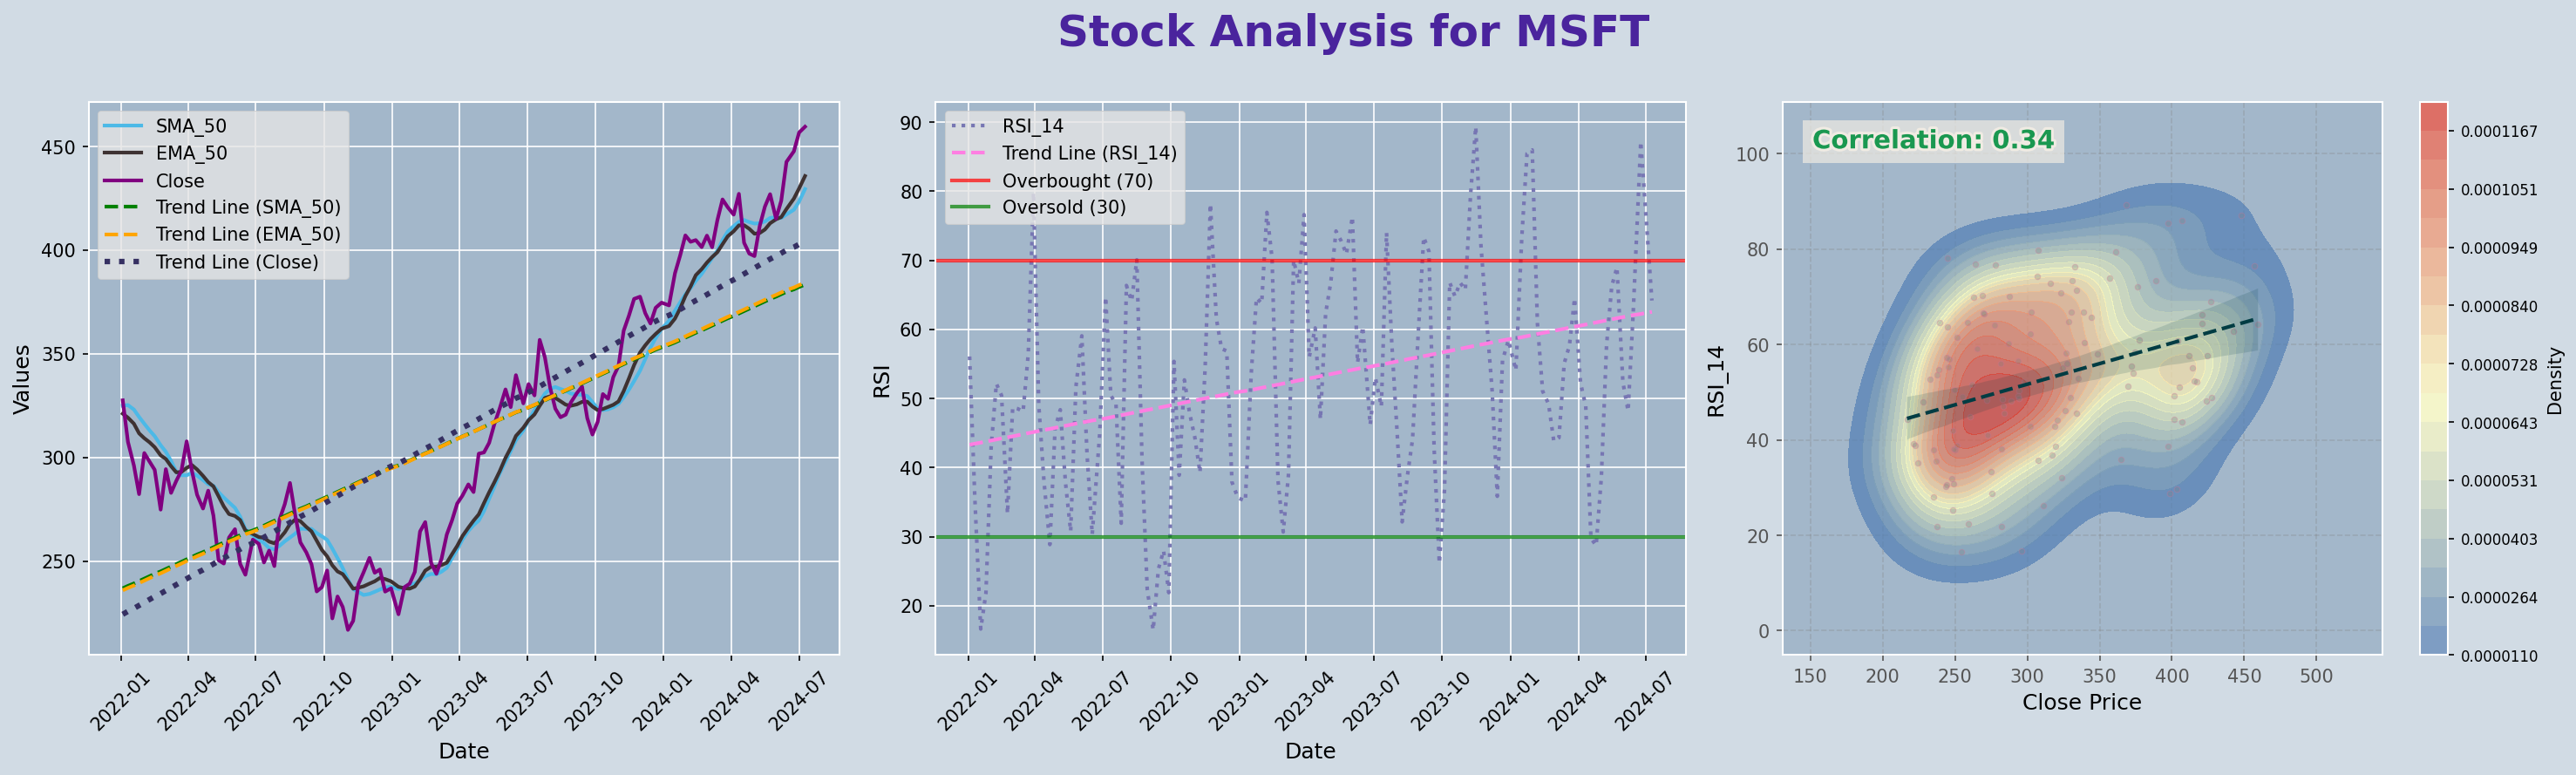

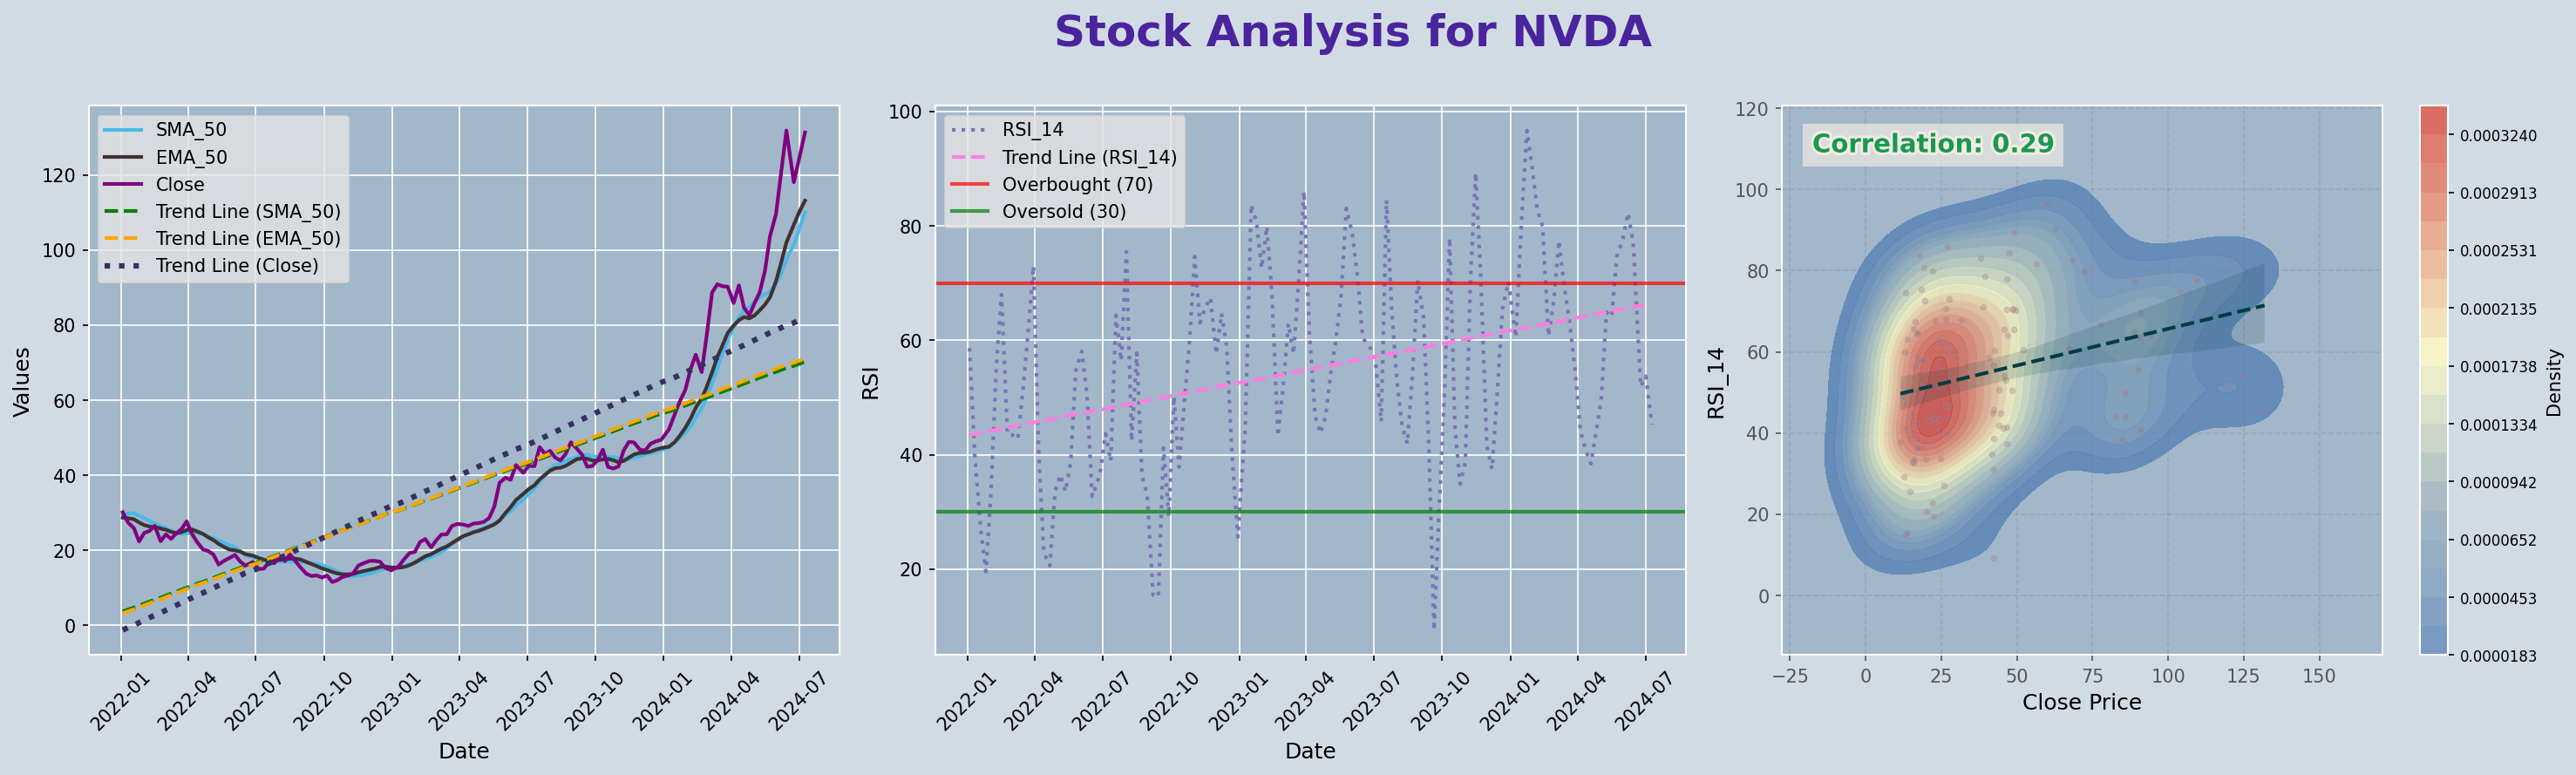

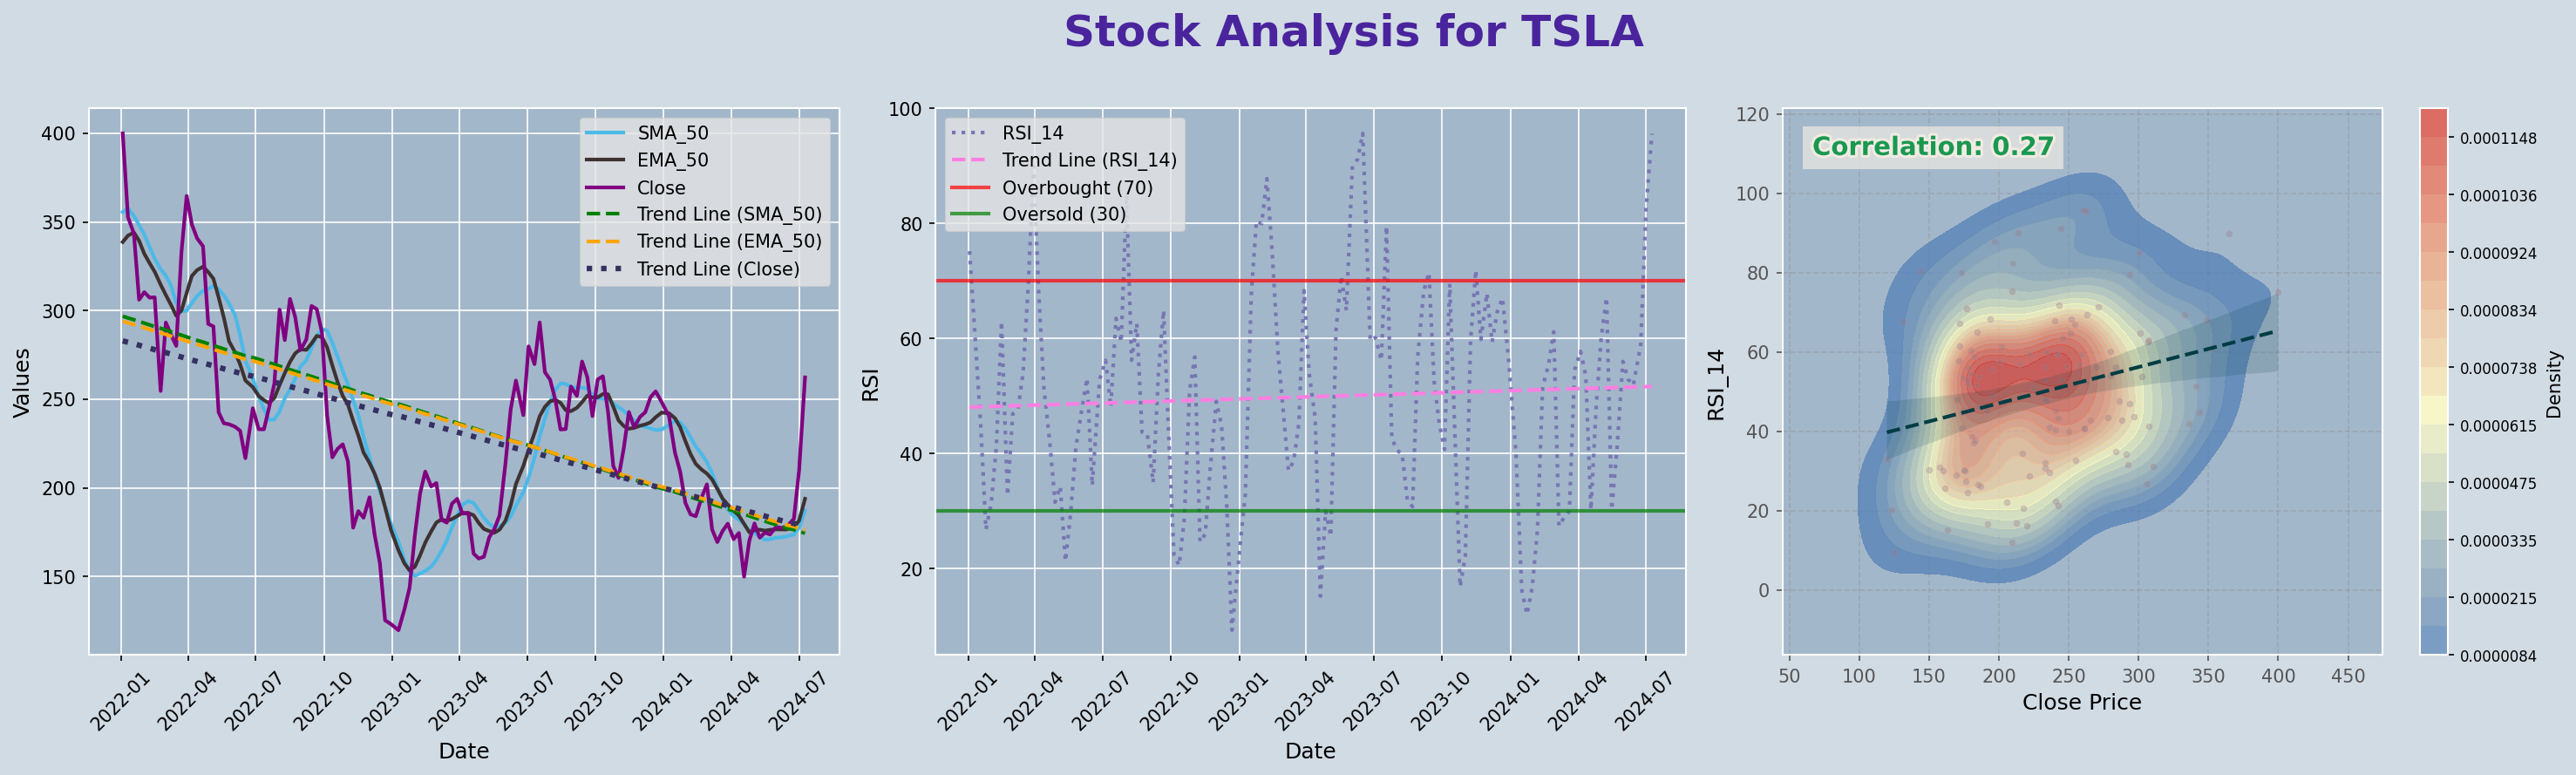

In [36]:
plt.style.use('ggplot')

def get_column_names(file_path):
    df = pd.read_csv(file_path, nrows=5)
    date_col = next((col for col in df.columns if 'date' in col.lower()), None)
    price_col = next((col for col in df.columns if 'close' in col.lower() or 'price' in col.lower()), None)
    volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
    if not all([date_col, price_col, volume_col]):
        print(f"Warning: Could not identify all required columns in {file_path}")
        print(f"Available columns: {df.columns.tolist()}")
    return date_col, price_col, volume_col

def load_and_preprocess_data(data_path: str) -> pd.DataFrame:
    """
    Load and preprocess the stock data from a CSV file.
    """
    data = pd.read_csv(data_path)
    date_column = 'date' if 'date' in data.columns else 'Date'
    data[date_column] = pd.to_datetime(data[date_column], format='%m/%d/%Y')
    data = data.sort_values(date_column)
    data = data.iloc[::5, :]  # Downsample data for clarity and size reduction
    return data

def plot_moving_averages(ax: plt.Axes, data: pd.DataFrame, date_column: str, close_column: str):
    """Plot SMA, EMA, and close price with trend lines."""
    z_sma = np.polyfit(data.index, data['Simple Moving Average_50'], 1)
    p_sma = np.poly1d(z_sma)
    z_ema = np.polyfit(data.index, data['Exponential Moving Average_50'], 1)
    p_ema = np.poly1d(z_ema)
    z_close = np.polyfit(data.index, data[close_column], 1)
    p_close = np.poly1d(z_close)

    ax.plot(data[date_column], data['Simple Moving Average_50'], label='SMA_50', color='#4CB9E7', linewidth=2)
    ax.plot(data[date_column], data['Exponential Moving Average_50'], label='EMA_50', color='#3E3232', linewidth=2)
    ax.plot(data[date_column], data[close_column], label='Close', color='purple', linewidth=2)
    ax.plot(data[date_column], p_sma(data.index), label='Trend Line (SMA_50)', color='green', linestyle='--', linewidth=2)
    ax.plot(data[date_column], p_ema(data.index), label='Trend Line (EMA_50)', color='orange', linestyle='--', linewidth=2)
    ax.plot(data[date_column], p_close(data.index), label='Trend Line (Close)', color='#363062', linestyle=':', linewidth=3)

    ax.set_xlabel('Date', fontsize=12, color='black')
    ax.set_ylabel('Values', fontsize=12, color='black')
    ax.legend(fontsize=10, labelcolor='black', prop={'size': 10})
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45, labelsize=10, colors='black')
    ax.tick_params(axis='y', labelsize=10, colors='black')

def plot_rsi(ax: plt.Axes, data: pd.DataFrame, date_column: str):
    """Plot RSI with trend line and overbought/oversold levels."""
    z_rsi = np.polyfit(data.index, data['Relative Strength Index 14'], 1)
    p_rsi = np.poly1d(z_rsi)

    ax.plot(data[date_column], data['Relative Strength Index 14'], label='RSI_14', linestyle=':', linewidth=2, color='#7776B3')
    ax.plot(data[date_column], p_rsi(data.index), label='Trend Line (RSI_14)', color='#FF7EE2', linestyle='--', linewidth=2)
    ax.axhline(70, linestyle='-', alpha=0.7, color='red', label='Overbought (70)', linewidth=2)
    ax.axhline(30, linestyle='-', alpha=0.7, color='green', label='Oversold (30)', linewidth=2)

    ax.set_xlabel('Date', fontsize=12, color='black')
    ax.set_ylabel('RSI', fontsize=12, color='black')
    ax.legend(fontsize=10, labelcolor='black', prop={'size': 10}, loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45, labelsize=10, colors='black')
    ax.tick_params(axis='y', labelsize=10, colors='black')

def plot_price_rsi_kde(ax: plt.Axes, data: pd.DataFrame, close_column: str):
    """Plot enhanced KDE of price and RSI with correlation information."""
    correlation, _ = stats.pearsonr(data[close_column], data['Relative Strength Index 14'])
    
    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list("custom", ["#4575B4", "#FFFFBF", "#D73027"])

    # Plot the KDE
    sns.kdeplot(
        x=data[close_column],
        y=data['Relative Strength Index 14'],
        ax=ax,
        cmap=cmap,
        fill=True,
        cbar=True,
        cbar_kws={'label': 'Density'},
        levels=20,
        alpha=0.7
    )
    
    # Add a scatter plot with low alpha for individual points
    ax.scatter(data[close_column], data['Relative Strength Index 14'], 
               color='gray', alpha=0.3, s=10, edgecolors='#DA7297', linewidth=0.5)
    
    # Add regression line
    sns.regplot(
        x=data[close_column],
        y=data['Relative Strength Index 14'],
        ax=ax,
        scatter=False,
        color='#003C43',
        line_kws={'linewidth': 2, 'linestyle': '--'}
    )
    
    # Customize the plot
    ax.set_xlabel('Close Price', fontsize=12, color='black')
    ax.set_ylabel('RSI_14', fontsize=12, color='black')
    ax.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    # Add correlation text with a subtle background
    corr_color = '#1a9850' if correlation > 0 else '#d73027'
    text = ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                   transform=ax.transAxes, fontsize=14, fontweight='bold',
                   verticalalignment='top', color=corr_color,
                   bbox=dict(facecolor='#F0EBE3', alpha=0.7, edgecolor='none', pad=5))
    text.set_path_effects([withStroke(linewidth=3, foreground='#F0EBE3')])

    # Adjust color bar
    cbar = ax.collections[0].colorbar
    cbar.set_label('Density', fontsize=10, color='black')
    cbar.ax.tick_params(labelsize=8, colors='black')

    # Set aspect ratio to 'auto' for better visualization
    ax.set_aspect('auto')

    return ax

def create_subplot(data_path: str, stock_name: str, axs: Tuple[plt.Axes, plt.Axes, plt.Axes]):
    """Create subplots for a single stock."""
    data = load_and_preprocess_data(data_path)
    date_column = 'date' if 'date' in data.columns else 'Date'
    close_column = 'close' if 'close' in data.columns else 'Adj Close' if 'Adj Close' in data.columns else 'Close'

    plot_moving_averages(axs[0], data, date_column, close_column)
    plot_rsi(axs[1], data, date_column)
    plot_price_rsi_kde(axs[2], data, close_column)

    for ax in axs:
        ax.set_facecolor('#a3b7ca')  # Set background color for axes

def plot_stocks_analysis(stock_paths: dict):
    """
    Plot analysis for multiple stocks.
    """
    for stock, path in stock_paths.items():
        fig, axs = plt.subplots(1, 3, figsize=(20, 6), dpi=150)
        create_subplot(path, stock, axs)
        fig.suptitle(f'Stock Analysis for {stock}', fontsize=24, fontweight='bold', color='#4A249D', x=0.52)
        fig.patch.set_facecolor('#d1dbe4')  # Set background color for figure
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.savefig(f'stock_analysis_{stock}.png', format='png', dpi=150, bbox_inches='tight')
        plt.show()

def main():
    """Main function to run the stock analysis."""
    stock_paths = {
        "AAPL": "D:/P2_Stocks/AAPL/AAPL_2.csv",
        "ADBE": "D:/P2_Stocks/ADBE/ADBE_2.csv",
        "AMZN": "D:/P2_Stocks/AMZN/AMZN_2.csv",
        "MSFT": "D:/P2_Stocks/MSFT/MSFT_2.csv",
        "NVDA": "D:/P2_Stocks/NVDA/NVDA_2.csv",
        "TSLA": "D:/P2_Stocks/TSLA/TSLA_2.csv"
    }

    plot_stocks_analysis(stock_paths)

if __name__ == "__main__":
    main()


### **Conclusion**

Regarding the stock and its moving averages, all have surpassed their 2023 averages to date, indicating a potential upward trend in the coming years. Even TSLA suggests a possible reversal after a downward trend.

Regarding the RSI (Relative Strength Index) and its correlation with the stock price, We could conclude **some Scenarios**:

Both Price and RSI are Increasing (+ne correlation):

Strong Bullish Trend: When both the price of a stock and its RSI are increasing, it indicates that the stock is experiencing a robust upward movement. This is because the RSI, which measures the magnitude of recent price changes, is also moving higher, suggesting strong buying momentum.

Actions:

Continue holding or buy more shares: Given the strong bullish trend, it might be advantageous to hold onto current positions or even add more shares, expecting the uptrend to continue.
Monitor for bearish divergences: Bearish divergence occurs when the price makes higher highs, but the RSI makes lower highs. This could indicate weakening momentum and a potential reversal, so it's essential to watch for this warning sign.

Let's analyze each stock given all this information:

**AAPL, MSFT, TSLA, NVDA**: These tickers have a moderate positive correlation (33% ,34% ,27% ,29%) between price and RSI respectively, indicating potential for higher prices in the coming years and a chance to hit the overbought line.

**ADBE, AMZN**: These tickers have a weak positive correlation (19% for ADBE, 21% for AMZN) between price and RSI respectively, which might indicate a reverse trend as there is no significant buying pressure on these stocks.

#### Non-Needed Scenarios (Feel Free to Skip Them)

Both Price and RSI are Decreasing (+ne correlation):

Strong Bearish Trend: When both the price and RSI are decreasing, it suggests that the stock is in a downtrend, with increasing selling pressure.
Momentum Confirmation: The declining RSI indicates that the momentum is in favor of the sellers. An RSI below 30 is typically considered oversold, but in a strong downtrend, it can remain low.
Actions:

Consider selling or avoiding buying: To protect against further losses, it may be prudent to sell current positions or avoid buying new shares.
Monitor for bullish divergences: Bullish divergence occurs when the price makes lower lows, but the RSI makes higher lows. This could signal that the downtrend is losing steam and a reversal may be on the horizon, so it's crucial to watch for this indication.

_______________________
Price is Increasing, but RSI is Decreasing (-ne correlation):

Bearish Divergence: This occurs when the stock price makes new highs, but the RSI fails to follow suit and makes lower highs. This divergence indicates that the underlying momentum driving the price increase is weakening.
Potential Reversal: While the price continues to rise, the decreasing RSI suggests that the buying pressure is diminishing, which could lead to a reversal.
Actions:

Be cautious about new purchases: Given the weakening momentum, it might not be the best time to buy additional shares, as the uptrend could be nearing its end.
Consider taking profits or tightening stop-loss orders: Protecting gains by taking profits can be a wise strategy. Alternatively, tightening stop-loss orders can limit potential losses if the trend reverses.
Watch closely for reversal signals: Indicators such as a breakdown in price support levels or bearish candlestick patterns can provide confirmation of a trend reversal.

____________________________
Price is Decreasing, but RSI is Increasing (-ne correlation):

Bullish Divergence: This occurs when the stock price makes new lows, but the RSI makes higher lows. This divergence indicates that the selling momentum is weakening.
Potential Reversal: While the price continues to fall, the increasing RSI suggests that the selling pressure is diminishing, which could lead to a reversal.
Actions:

Consider potential buying opportunities: The weakening downward momentum might present an opportunity to buy shares at a lower price before a potential reversal.
Wait for confirmation of the trend reversal before making significant trades: Ensure that there are additional signs of a trend reversal, such as a breakout above resistance levels or bullish candlestick patterns, before committing to large trades.
Monitor for additional bullish signals: Look for further confirmation from other technical indicators or volume patterns to strengthen the case for a reversal.

## Section 3: Q3 Answer


### 3.) What is the financial health of each company, and what are the primary metrics to focus on?

To analyze the financial statements correctly we have to consider main ratios to focus on and know how their changes over the period from 6/29/2019 to 3/30/2024 quarterly.

Ratios will be used:

### **Asset To Liability** 

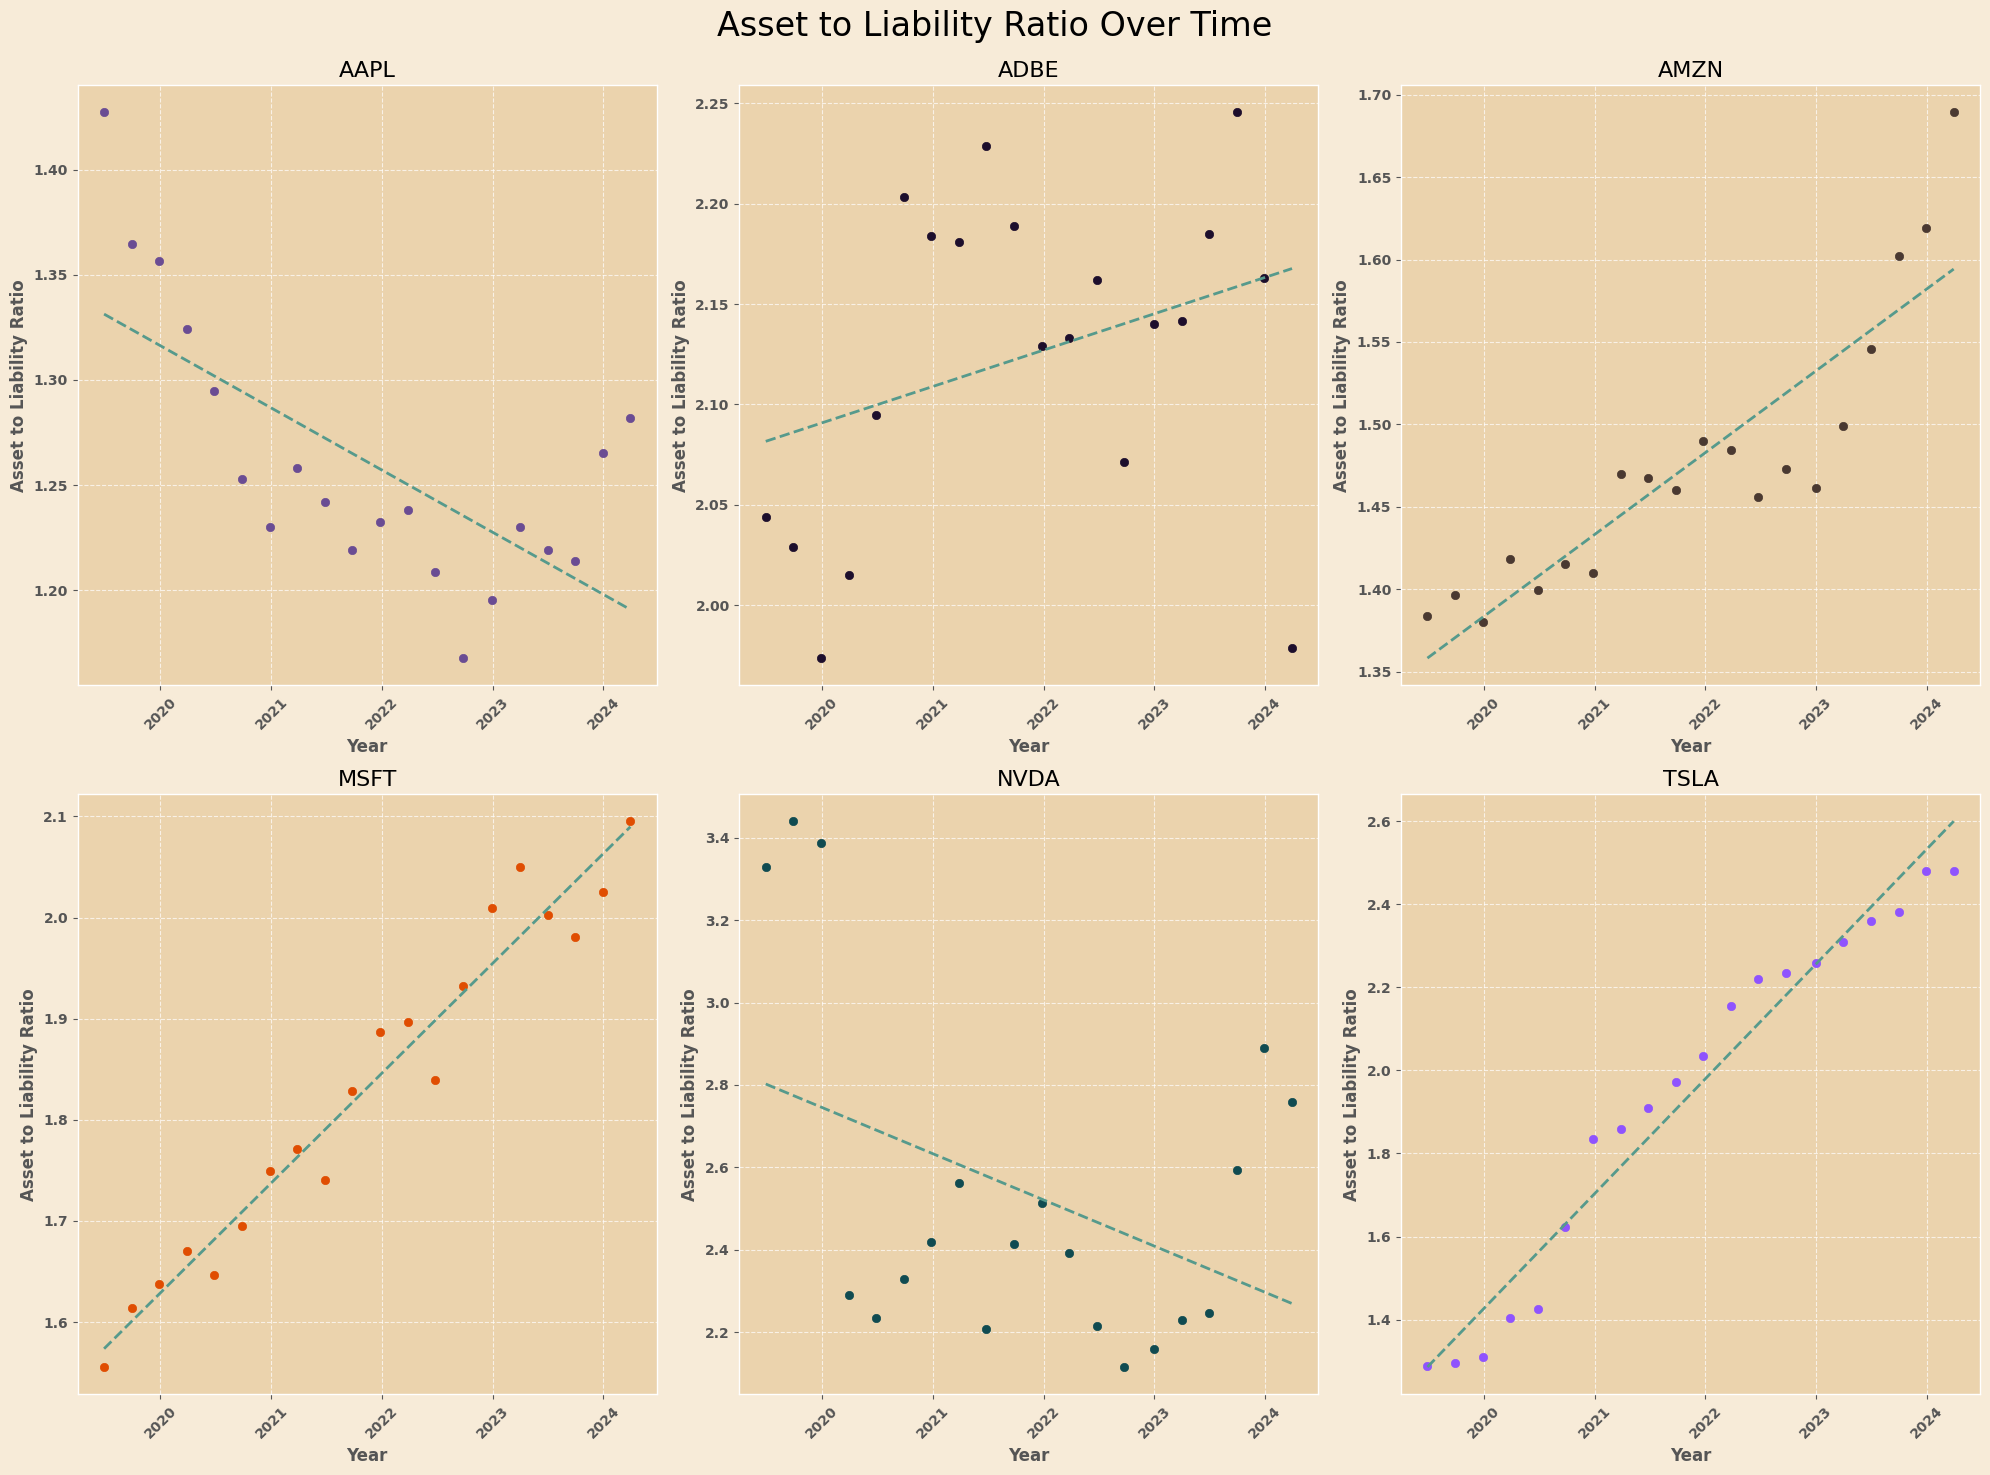

In [49]:
# Load the data from the Excel file
file_path = r"D:\python\financial_ratios.xlsx"
df = pd.read_excel(file_path,sheet_name=0)

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Asset to Liability Ratio Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'Asset to Liability Ratio {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name], color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'])
        y = df[column_name]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(x), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Asset to Liability Ratio', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
                # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')

        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()

#### Conclusion 


Financial Health and Leverage

Higher ATL Ratio (> 1): Indicates that the company has more assets than liabilities. This is generally a positive sign, suggesting that the company is in a good position to cover its liabilities with its assets. It implies lower financial risk and higher financial stability.

Lower ATL Ratio (< 1): Indicates that the company has more liabilities than assets. This can be a red flag, suggesting potential financial instability or over-leverage. It means the company might struggle to cover its liabilities, indicating higher financial risk.

A high asset to liability ratio generally boosts investor confidence, as it signals financial stability and the ability to meet obligations. This confidence can drive up the stock price.

What about those with a downward trendline?

For instance, AAPL has a trendline indicating that its liabilities exceed its assets, which could result in poor financial health and heavy leverage.

Regarding NVDA, it is similar to AAPL but still has a chance to maintain stability if its ratio remains above 2 and does not decrease below this threshold.

### **Debt To Equity**

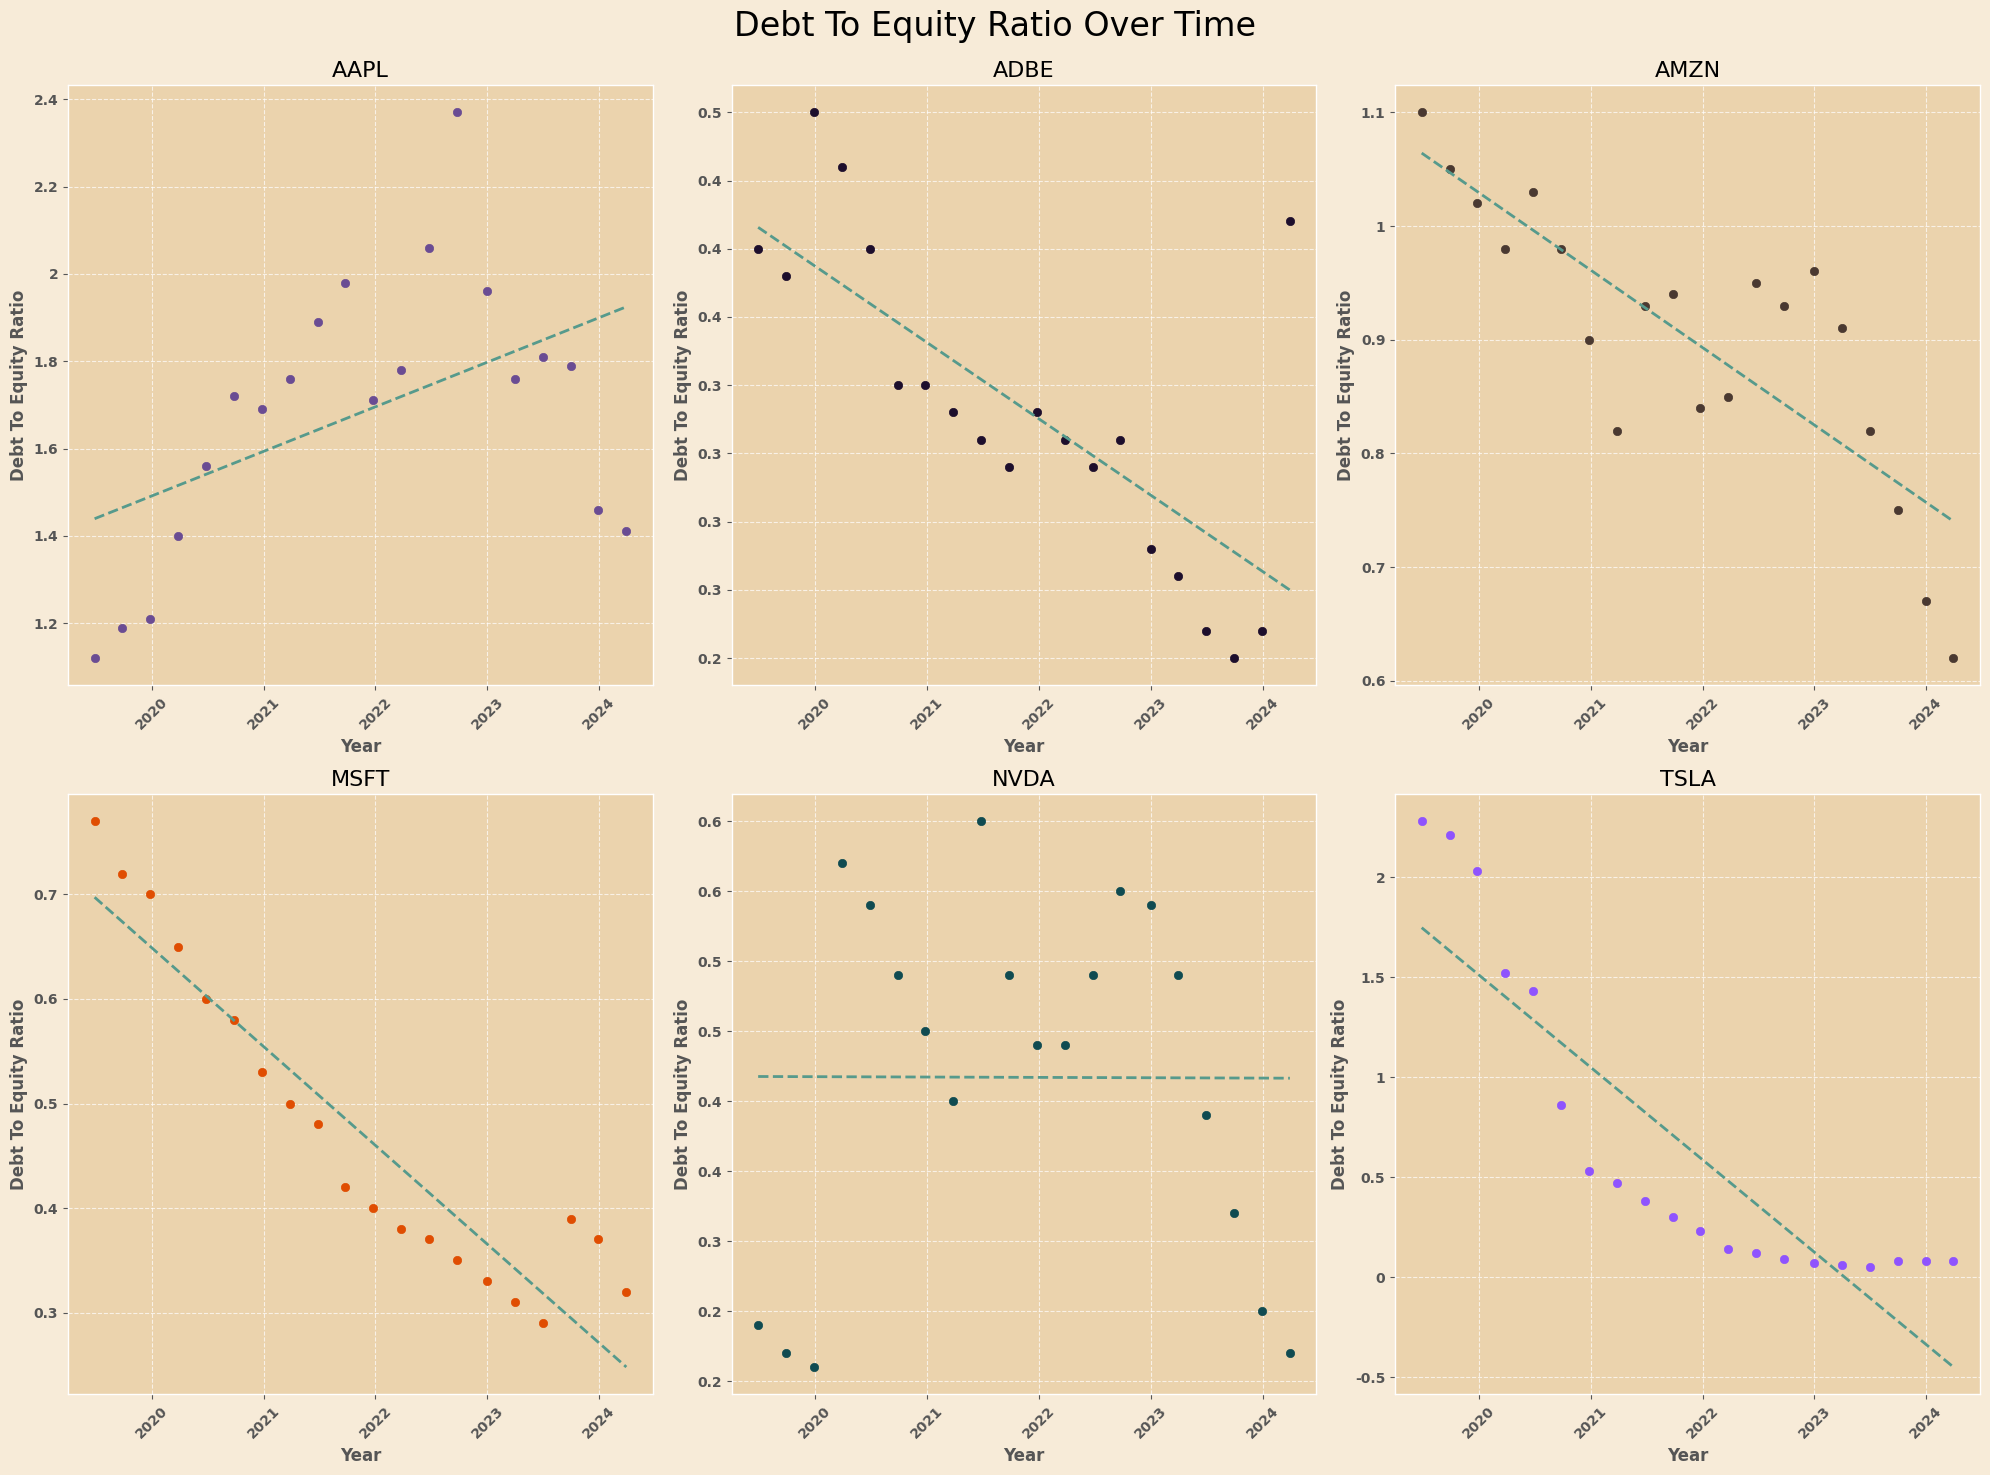

In [50]:
# Load the data from the second sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=1)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, forcing errors to NaN
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'D/E Ratio {company}'
    if column_name in df.columns:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Custom formatter function for numbers without trailing zeros
def custom_formatter(x, pos):
    if x == int(x):
        return f'{int(x)}'
    else:
        return f'{x:.1f}'

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Debt To Equity Ratio Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'D/E Ratio {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name], color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna()
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Debt To Equity Ratio', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
                # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
        
        # Format y-axis to show numbers without trailing zeros
        ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()


#### Conclusion

This measure is crucial in directly indicating the impact of fluctuations in stock price and the degree of leverage used by the company, along with its consequences.

While generally, a lower measure is better, this is not always the case.

Risk Perception: A high D/E ratio can make investors wary as it indicates higher financial risk. If the company is perceived as too leveraged, investors might demand a higher return for holding the stock (Risk and Return relationship), which can lead to a lower stock price.

Cost of Capital: Companies with high debt may face higher interest expenses, which can reduce profitability. Lower profitability can lead to lower dividends and earnings growth, potentially resulting in a lower stock price.

If the measure is below 1, it means the company does not have any distressed debts and enjoys some flexibility and financial safety.

However, AAPL has raised a red flag for the second time as its Debt-to-Equity (DTE) ratio continues to increase, which might signal potential constraints on its stock price growth due to lender concerns.

### **Debt Ratio**

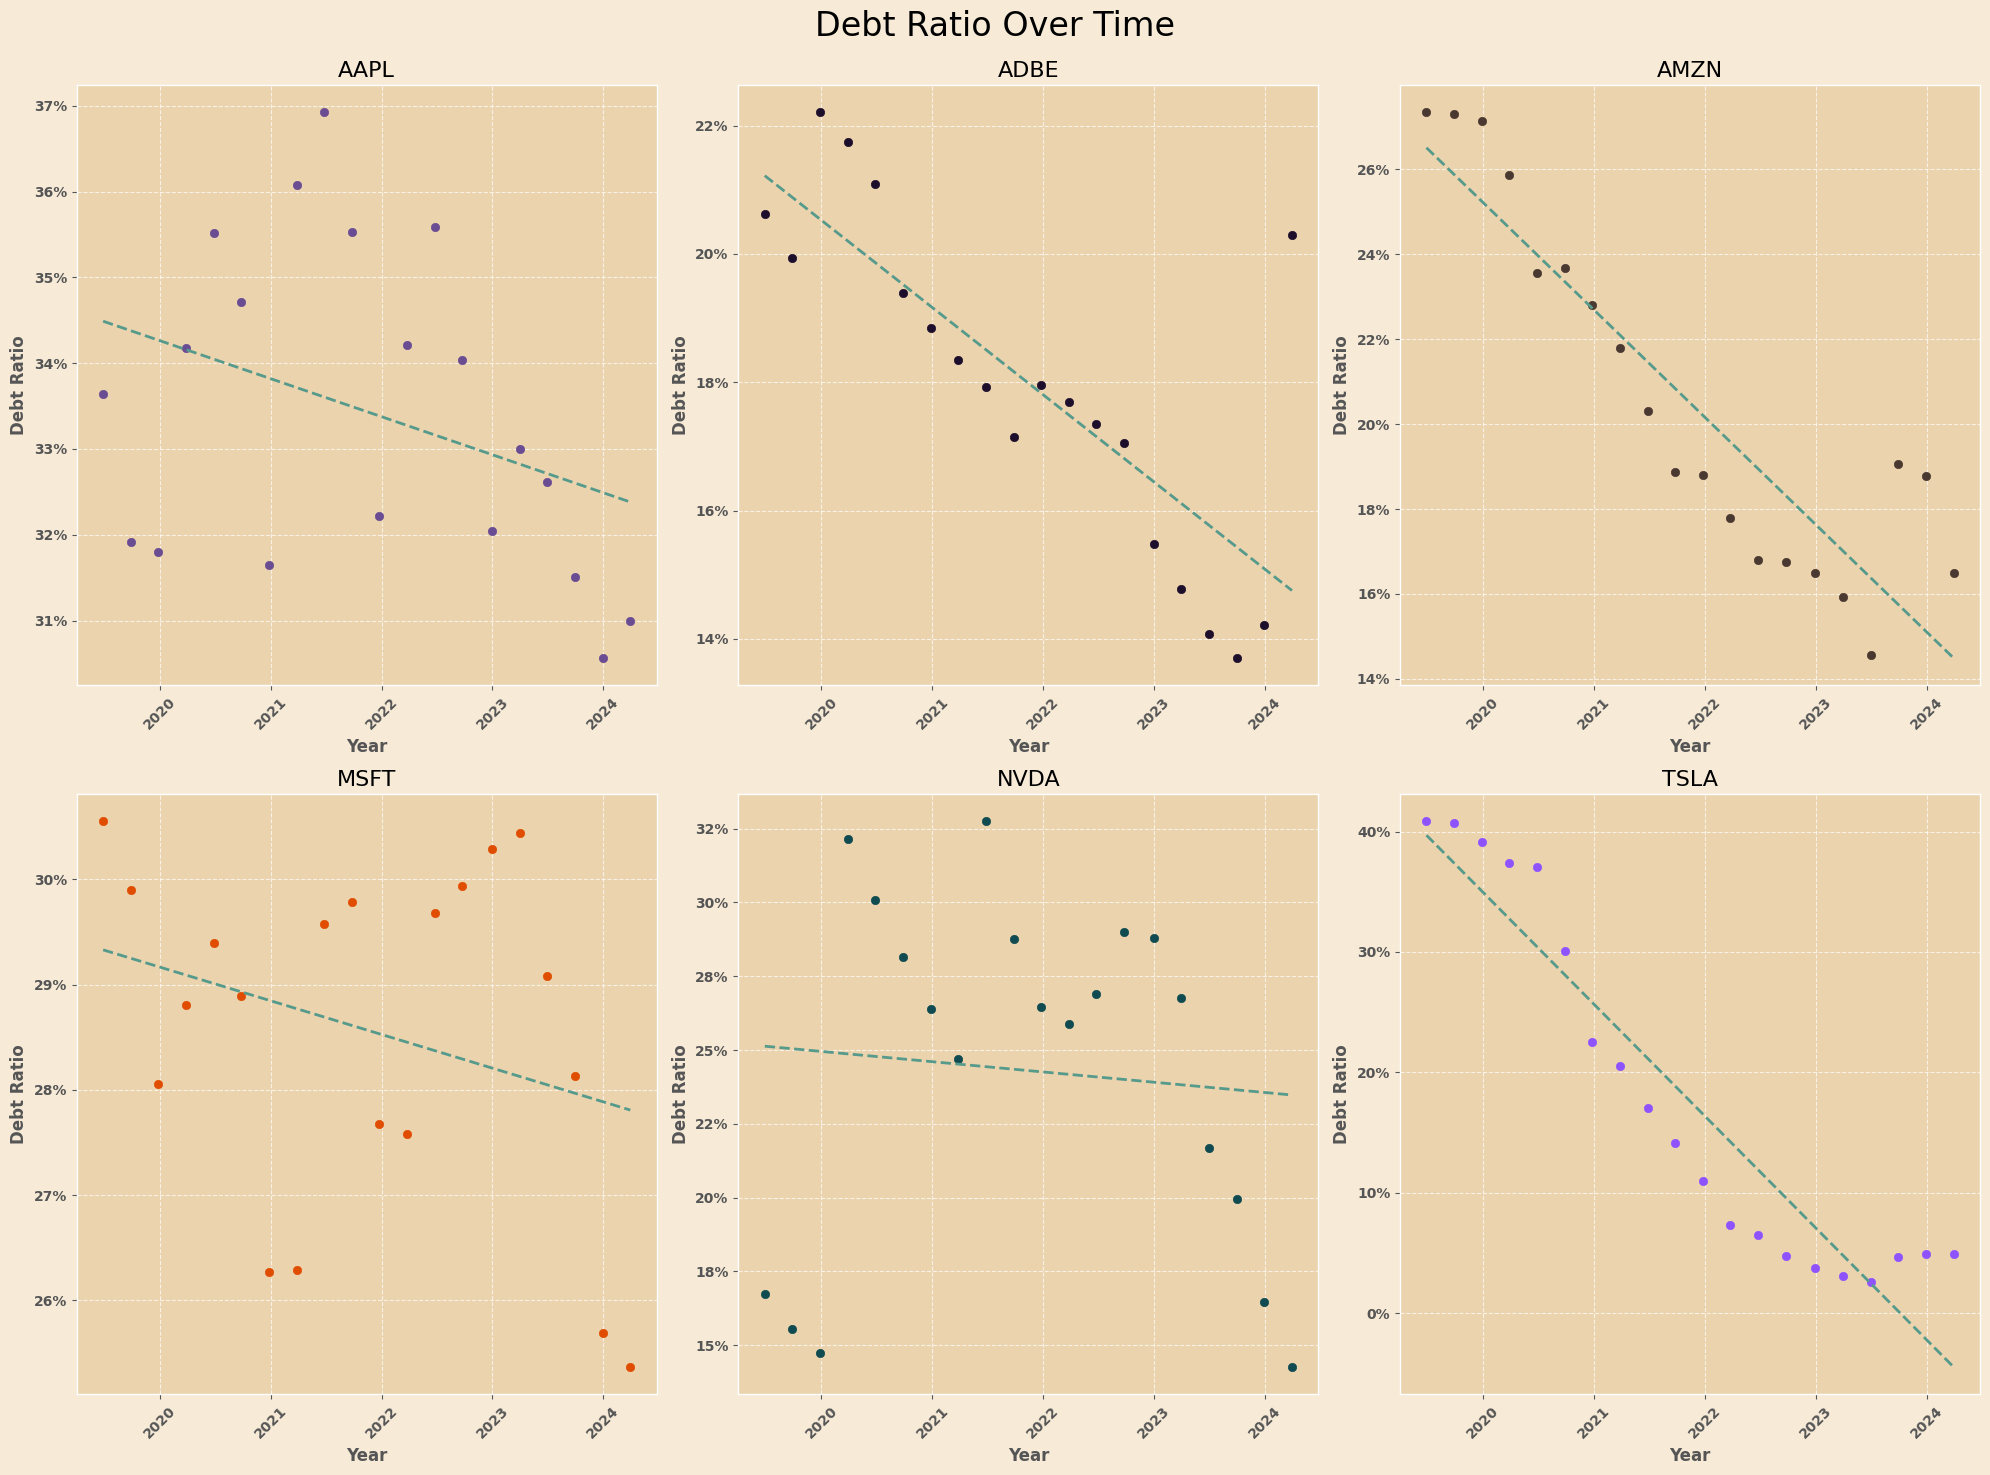

In [51]:
# Load the data from the third sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=2)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, forcing errors to NaN
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'Debt Ratio {company}'
    if column_name in df.columns:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Debt Ratio Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'Debt Ratio {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name] * 100, color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna() * 100
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Debt Ratio', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
                # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
       
        # Format y-axis to show percentages
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        
# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure
      
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()


#### Conclusion

In this context, we compare the company's total debt to its assets. A lower ratio is better, indicating the company is in a good position regarding its assets.

Perceived Risk: A high debt ratio can be a red flag for investors as it indicates higher financial risk. Companies with high debt ratios are more vulnerable to interest rate hikes and economic downturns, which can lead to a decrease in stock price as investors seek less risky alternatives.

Earnings Volatility: High levels of debt mean higher interest payments, which can reduce net income. If the company's earnings become volatile due to high interest obligations, investors may be less willing to pay a premium for the stock, potentially leading to a lower stock price.

Financial Health and Investor Confidence: Investors often view companies with lower debt ratios as financially healthier and more capable of weathering economic uncertainties. Higher investor confidence can lead to increased demand for the stock, driving up its price.

### **EBIT Margin**

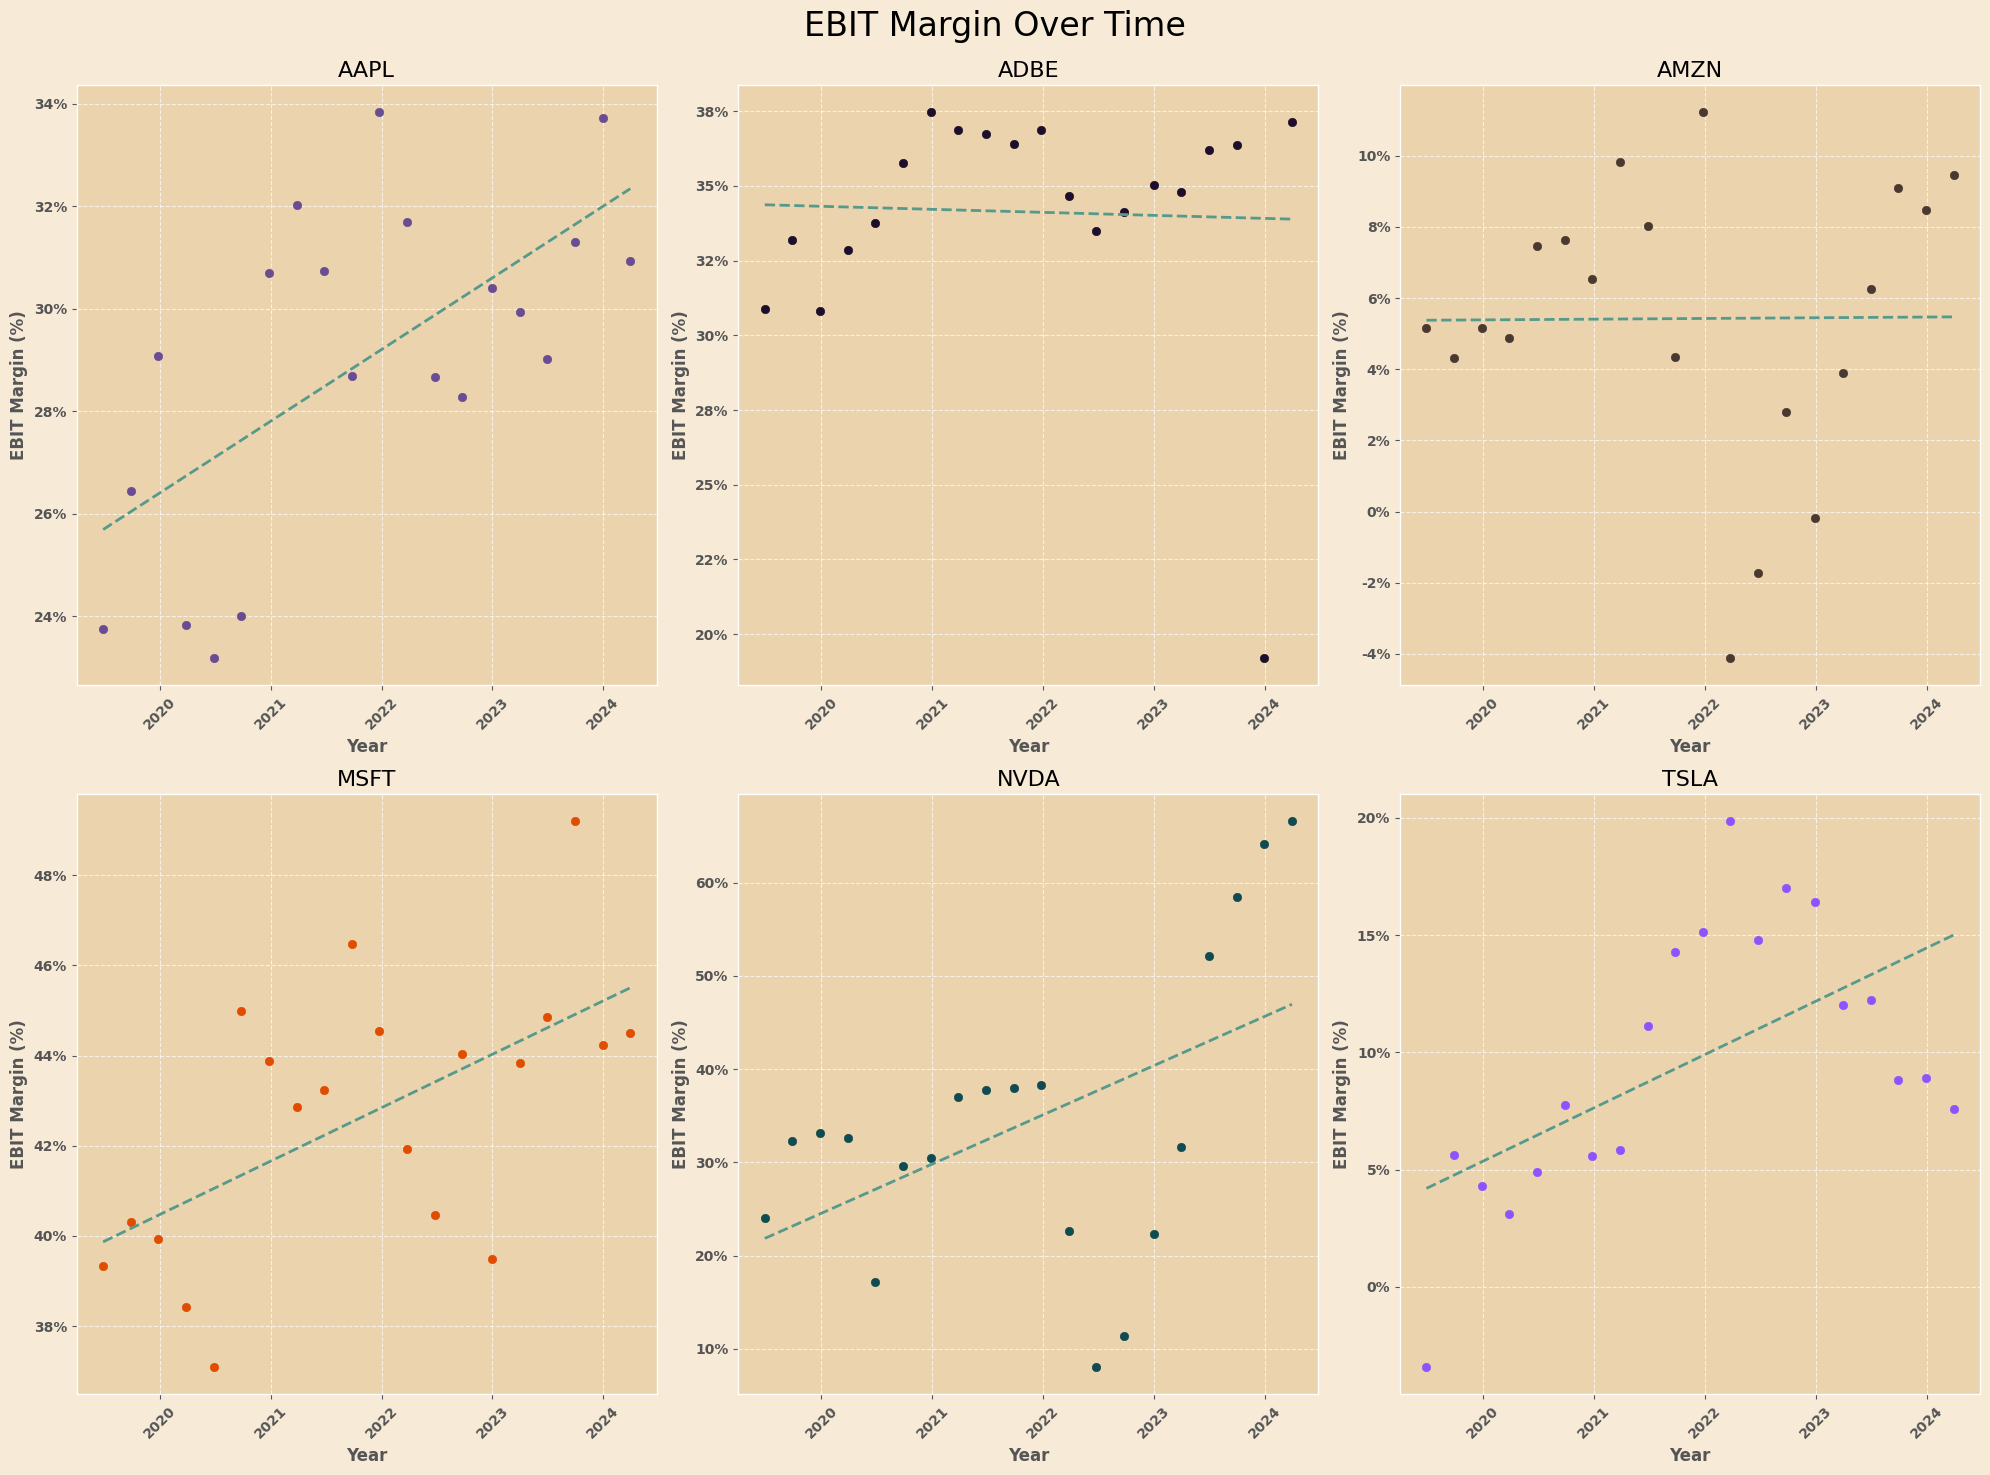

In [52]:
# Load the data from the third sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=3)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, forcing errors to NaN
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'EBIT Margin {company}'
    if column_name in df.columns:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('EBIT Margin Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'EBIT Margin {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name] * 100, color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna() * 100
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('EBIT Margin (%)', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
                # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
        
        # Format y-axis to show percentages
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

 # Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure
       
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()


#### Conclusion

In this measure, we consider the Earnings Before Interest and Tax (EBIT). A higher EBIT is better, as it indicates a strong position for increasing revenue and improving financial health.

Indicator of Financial Health: A high or improving EBIT margin is often seen as a sign of good financial health and operational efficiency. This can lead to increased investor confidence and a higher stock price.

Growth Potential: Companies with higher EBIT margins are typically viewed as having greater potential for growth because they are more efficient at converting revenues into profits. Investors might be willing to pay a premium for such companies, leading to higher stock prices.

### **Free Cash Flow Margin**

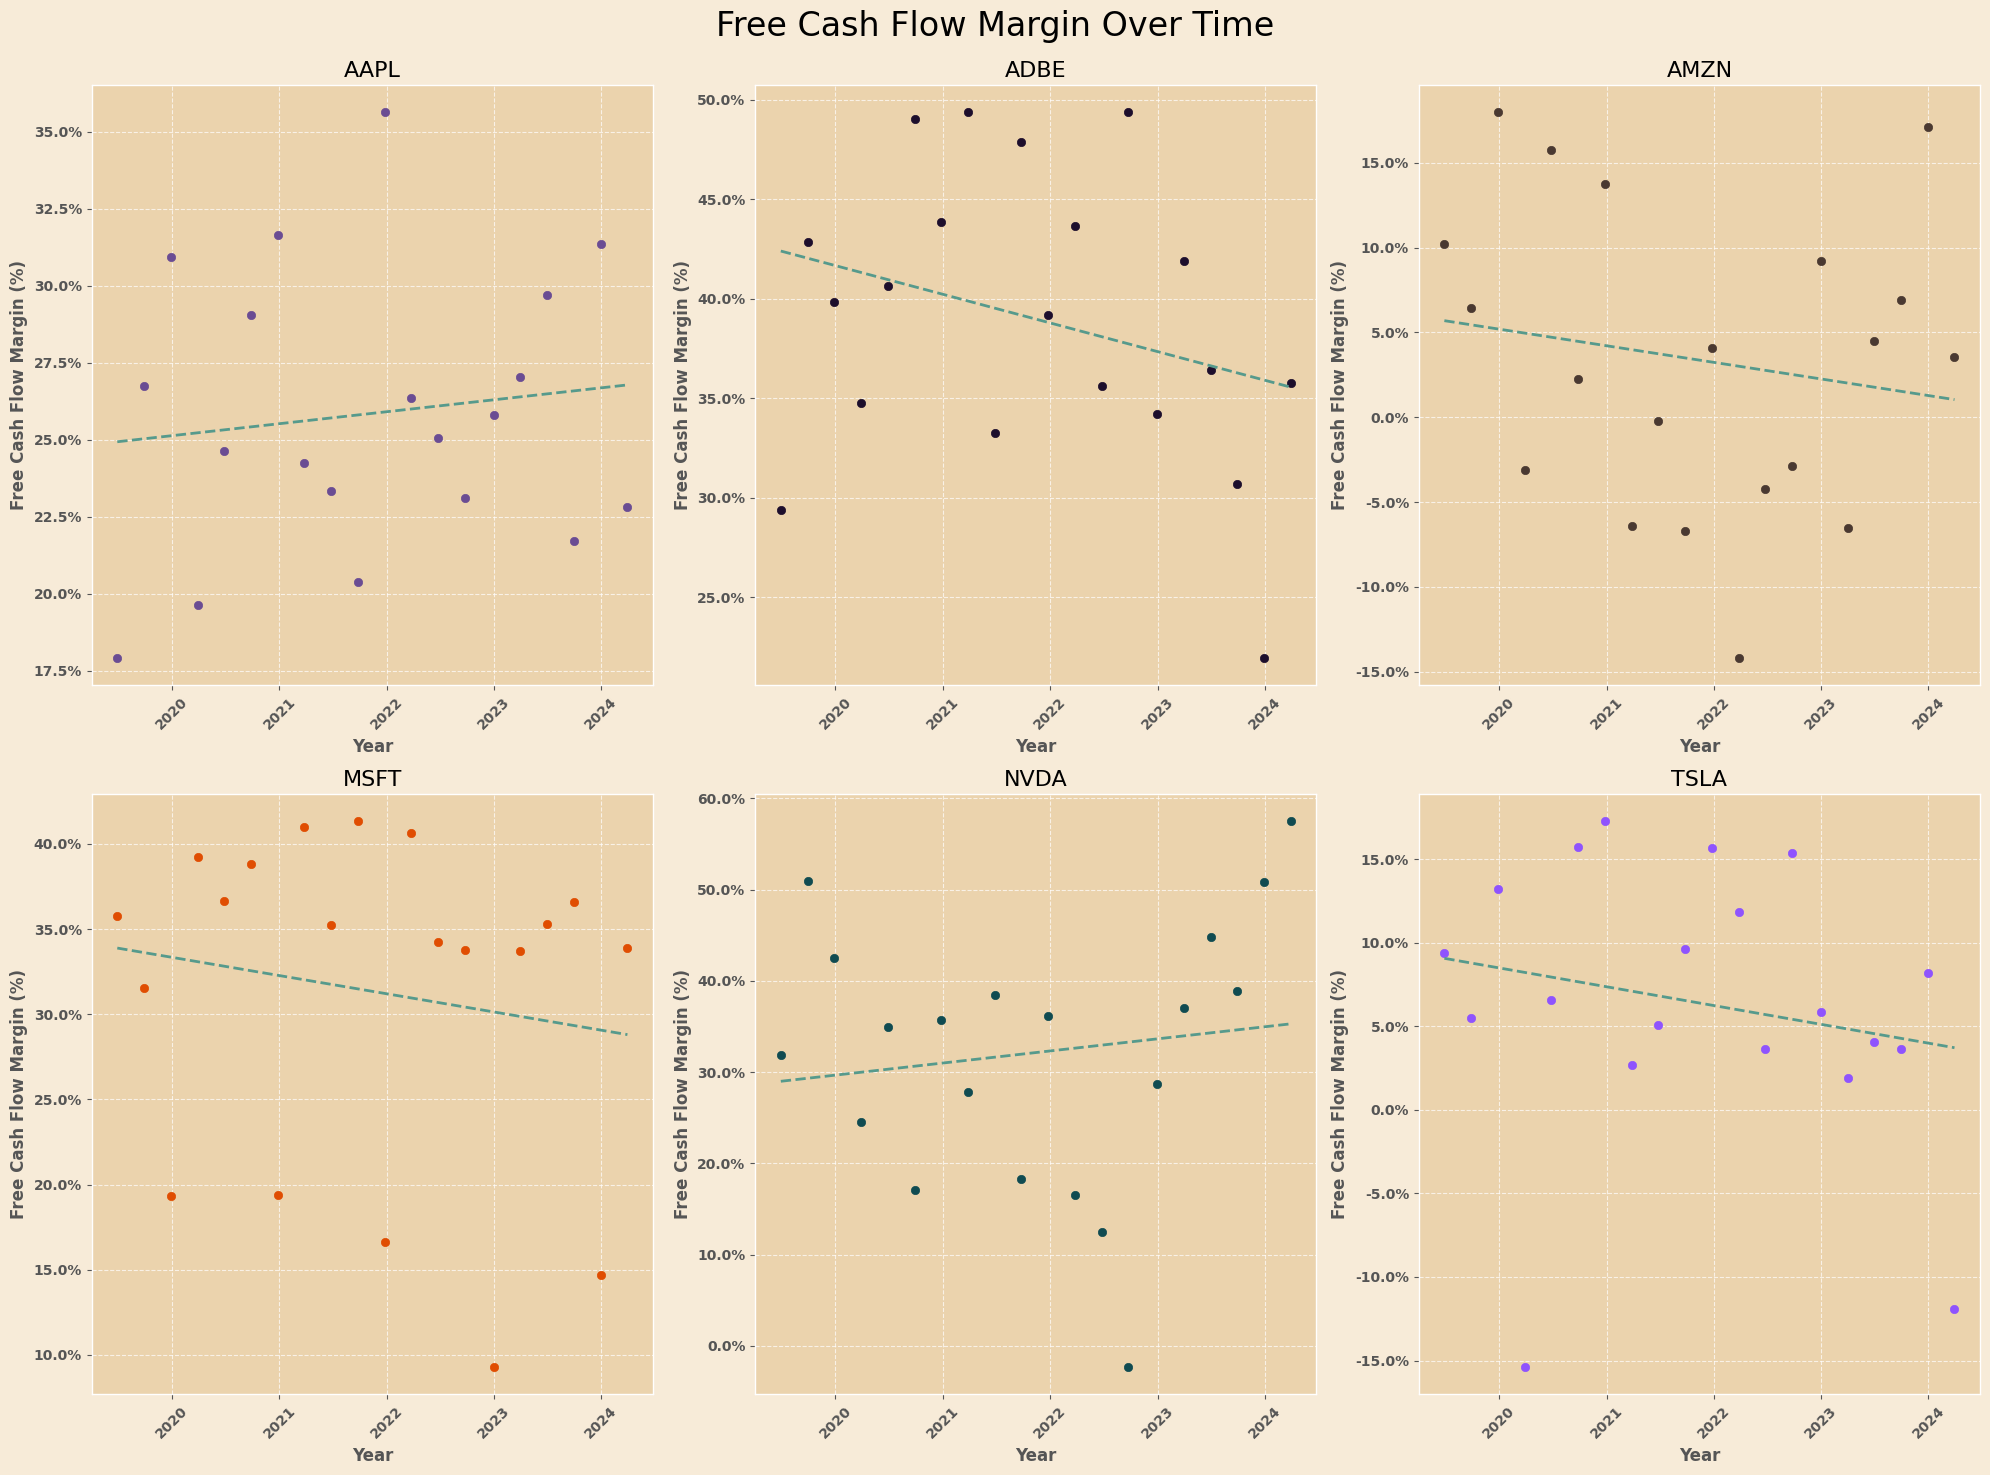

In [53]:
# Load the data from the specified sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=4)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, removing percentage signs and converting to floats
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'Free Cash Flow Margin {company}'
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.replace('%', '').astype(float)
        df[column_name] = df[column_name].replace(0, np.nan)

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Free Cash Flow Margin Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'Free Cash Flow Margin {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name] * 100, color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna() * 100
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Free Cash Flow Margin (%)', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
        
        # Format y-axis to show percentages
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()

#### Conclusion

A higher FCF Margin indicates that a company is efficiently converting its revenue into cash that is available for distribution to shareholders, debt repayment, or reinvestment into the business.It provides insight into the company's liquidity and overall financial health, showing how well it can cover its obligations and invest in growth opportunities without relying on external financing and forced to decrease its stock price.

Indicator of Value: Investors often view companies with higher Free Cash Flow Margins as more attractive because these companies are generating more cash relative to their sales, indicating strong underlying business health. This can lead to higher stock prices as investors are willing to pay a premium for financially healthy companies.

Predictor of Dividends: Companies with substantial free cash flow are more likely to pay and increase dividends. Since dividends are a key attraction for many investors, higher Free Cash Flow Margins can positively influence stock prices.

Reduced Financial Risk: Companies generating significant free cash flow are better positioned to withstand economic downturns, as they have the cash needed to cover expenses even during tough times. This perceived lower risk can make the stock more attractive, supporting higher stock prices.

The downward trends are seen in TSLA, AMZN, and ADBE. These companies might be compelled to rely on external financing and could be forced to decrease their stock prices.

### **Free Cash Flow Per Share**

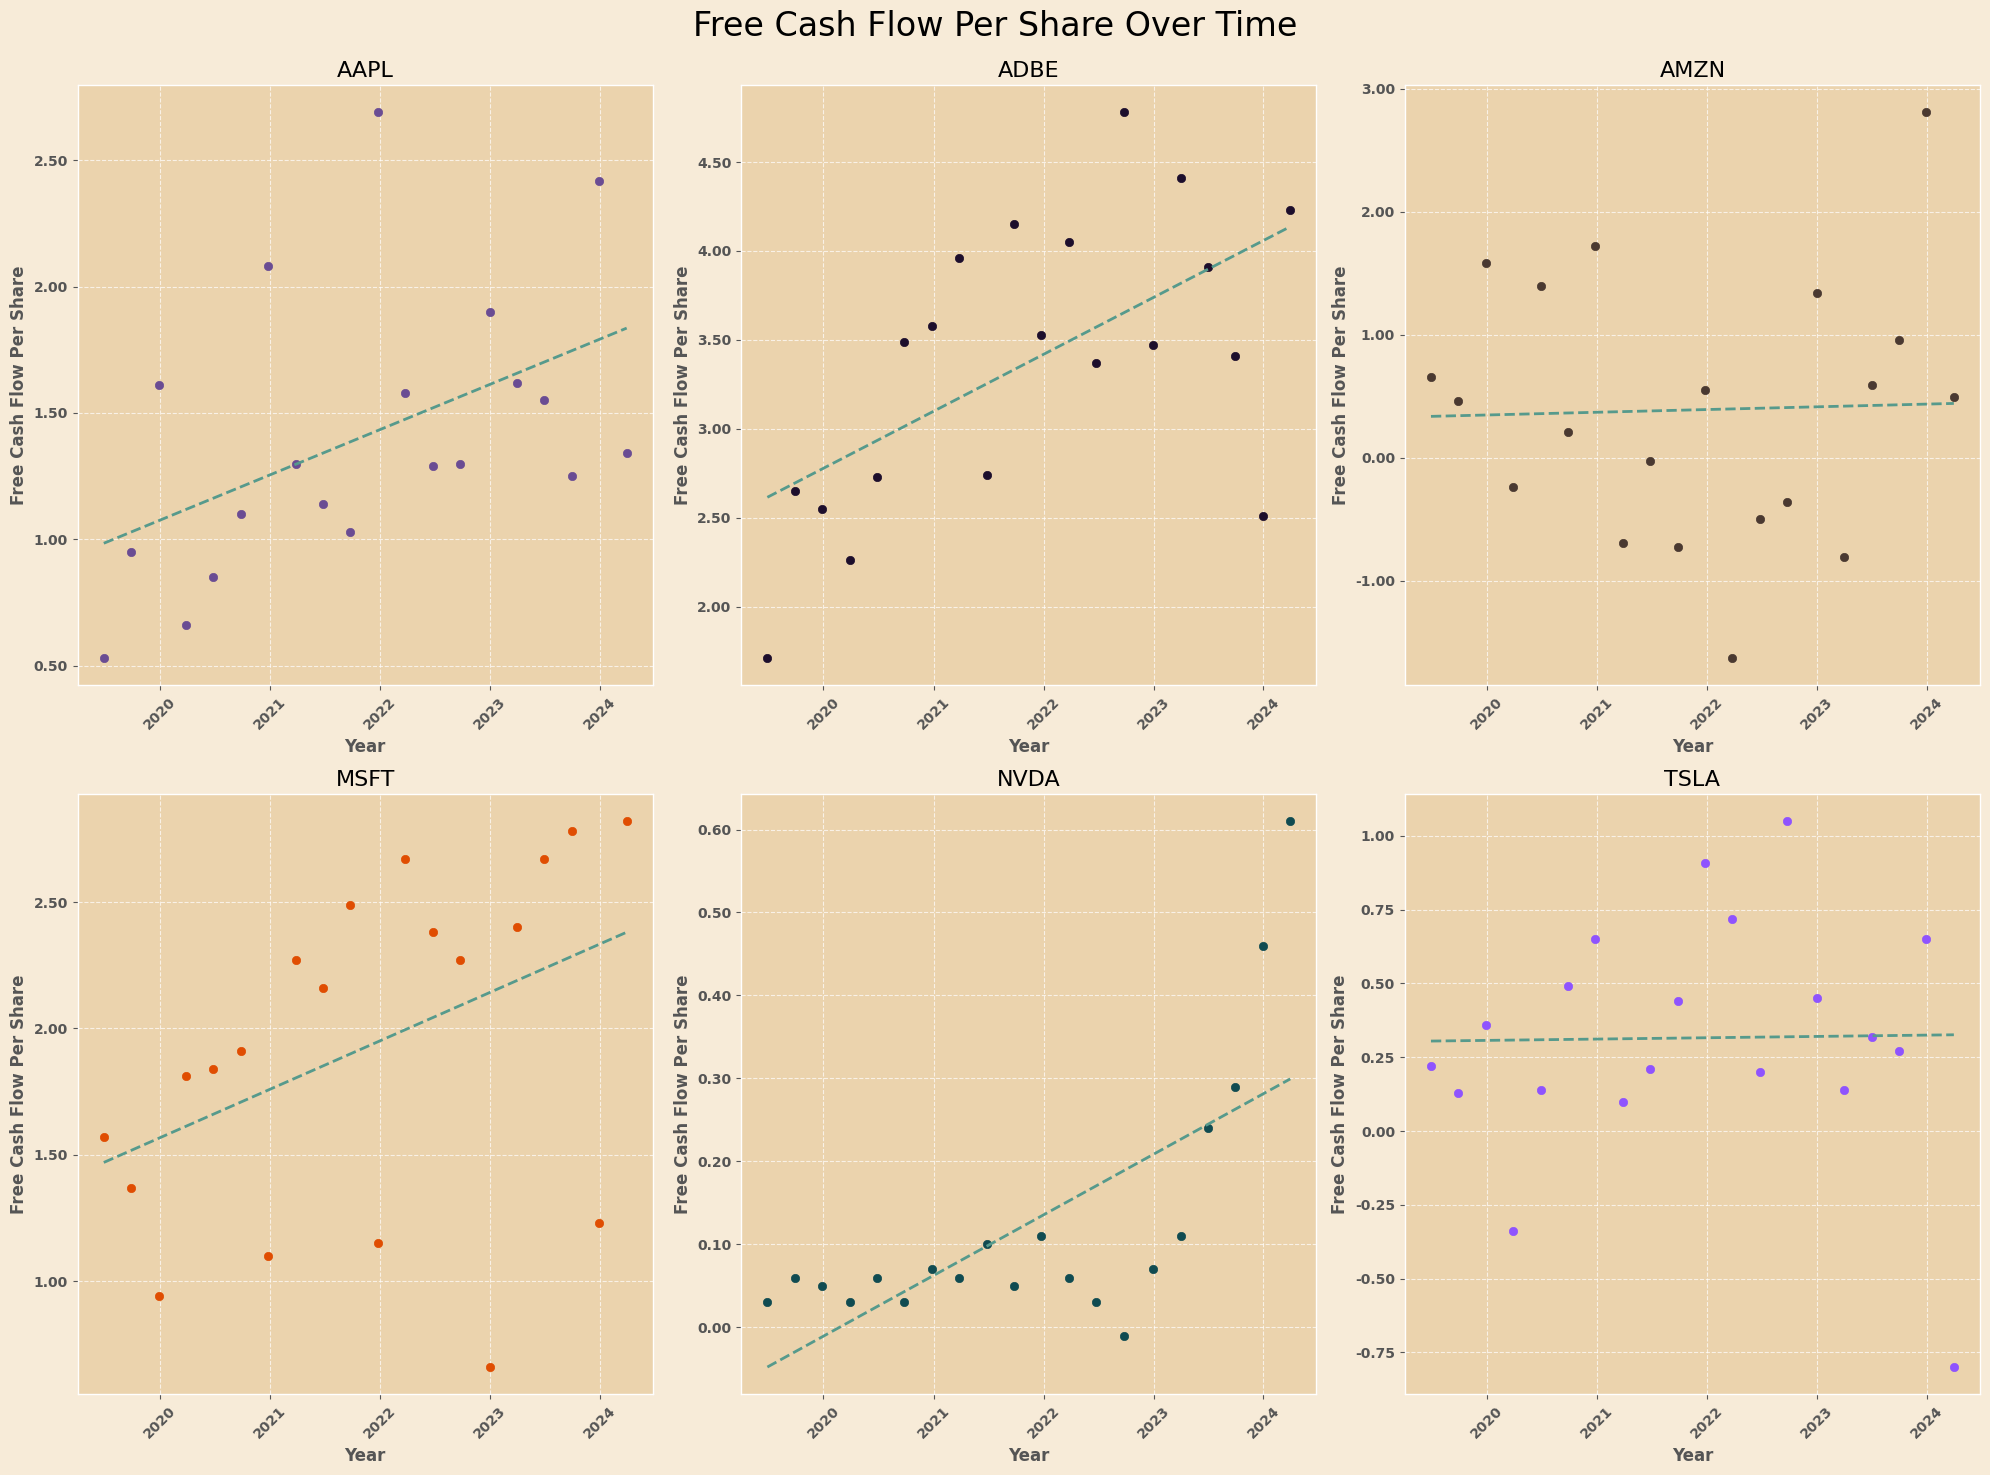

In [54]:
# Load the data from the specified sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=5)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, removing percentage signs and converting to floats
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'Free Cash Flow Per Share {company}'
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.replace('%', '').astype(float)
        df[column_name] = df[column_name].replace(0, np.nan)

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Free Cash Flow Per Share Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'Free Cash Flow Per Share {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name], color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna()
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Free Cash Flow Per Share', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')

        # Format y-axis to show actual numbers
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()

#### Conclusion

indicates how much cash a company generates per share after accounting for capital expenditures necessary to maintain or expand its asset base. It provides insight into a company’s ability to generate additional cash that can be used for various purposes such as paying dividends, repurchasing shares, reducing debt, or reinvesting in the business.

We will focus on the downward trends in the FCFM graph (TSLA, AMZN, ADBE).

Investor Confidence: A strong FCFPS can boost investor confidence, as it indicates that the company is generating enough cash to meet its obligations and invest in future growth. This confidence can lead to higher demand for the stock, driving up its price.

For ADBE, we observe an upward trend. However, TSLA and AMZN still have unfavorable measures, which increases the likelihood of their stock prices decreasing due to reliance on external debts.

### **Price to Book Ratio**

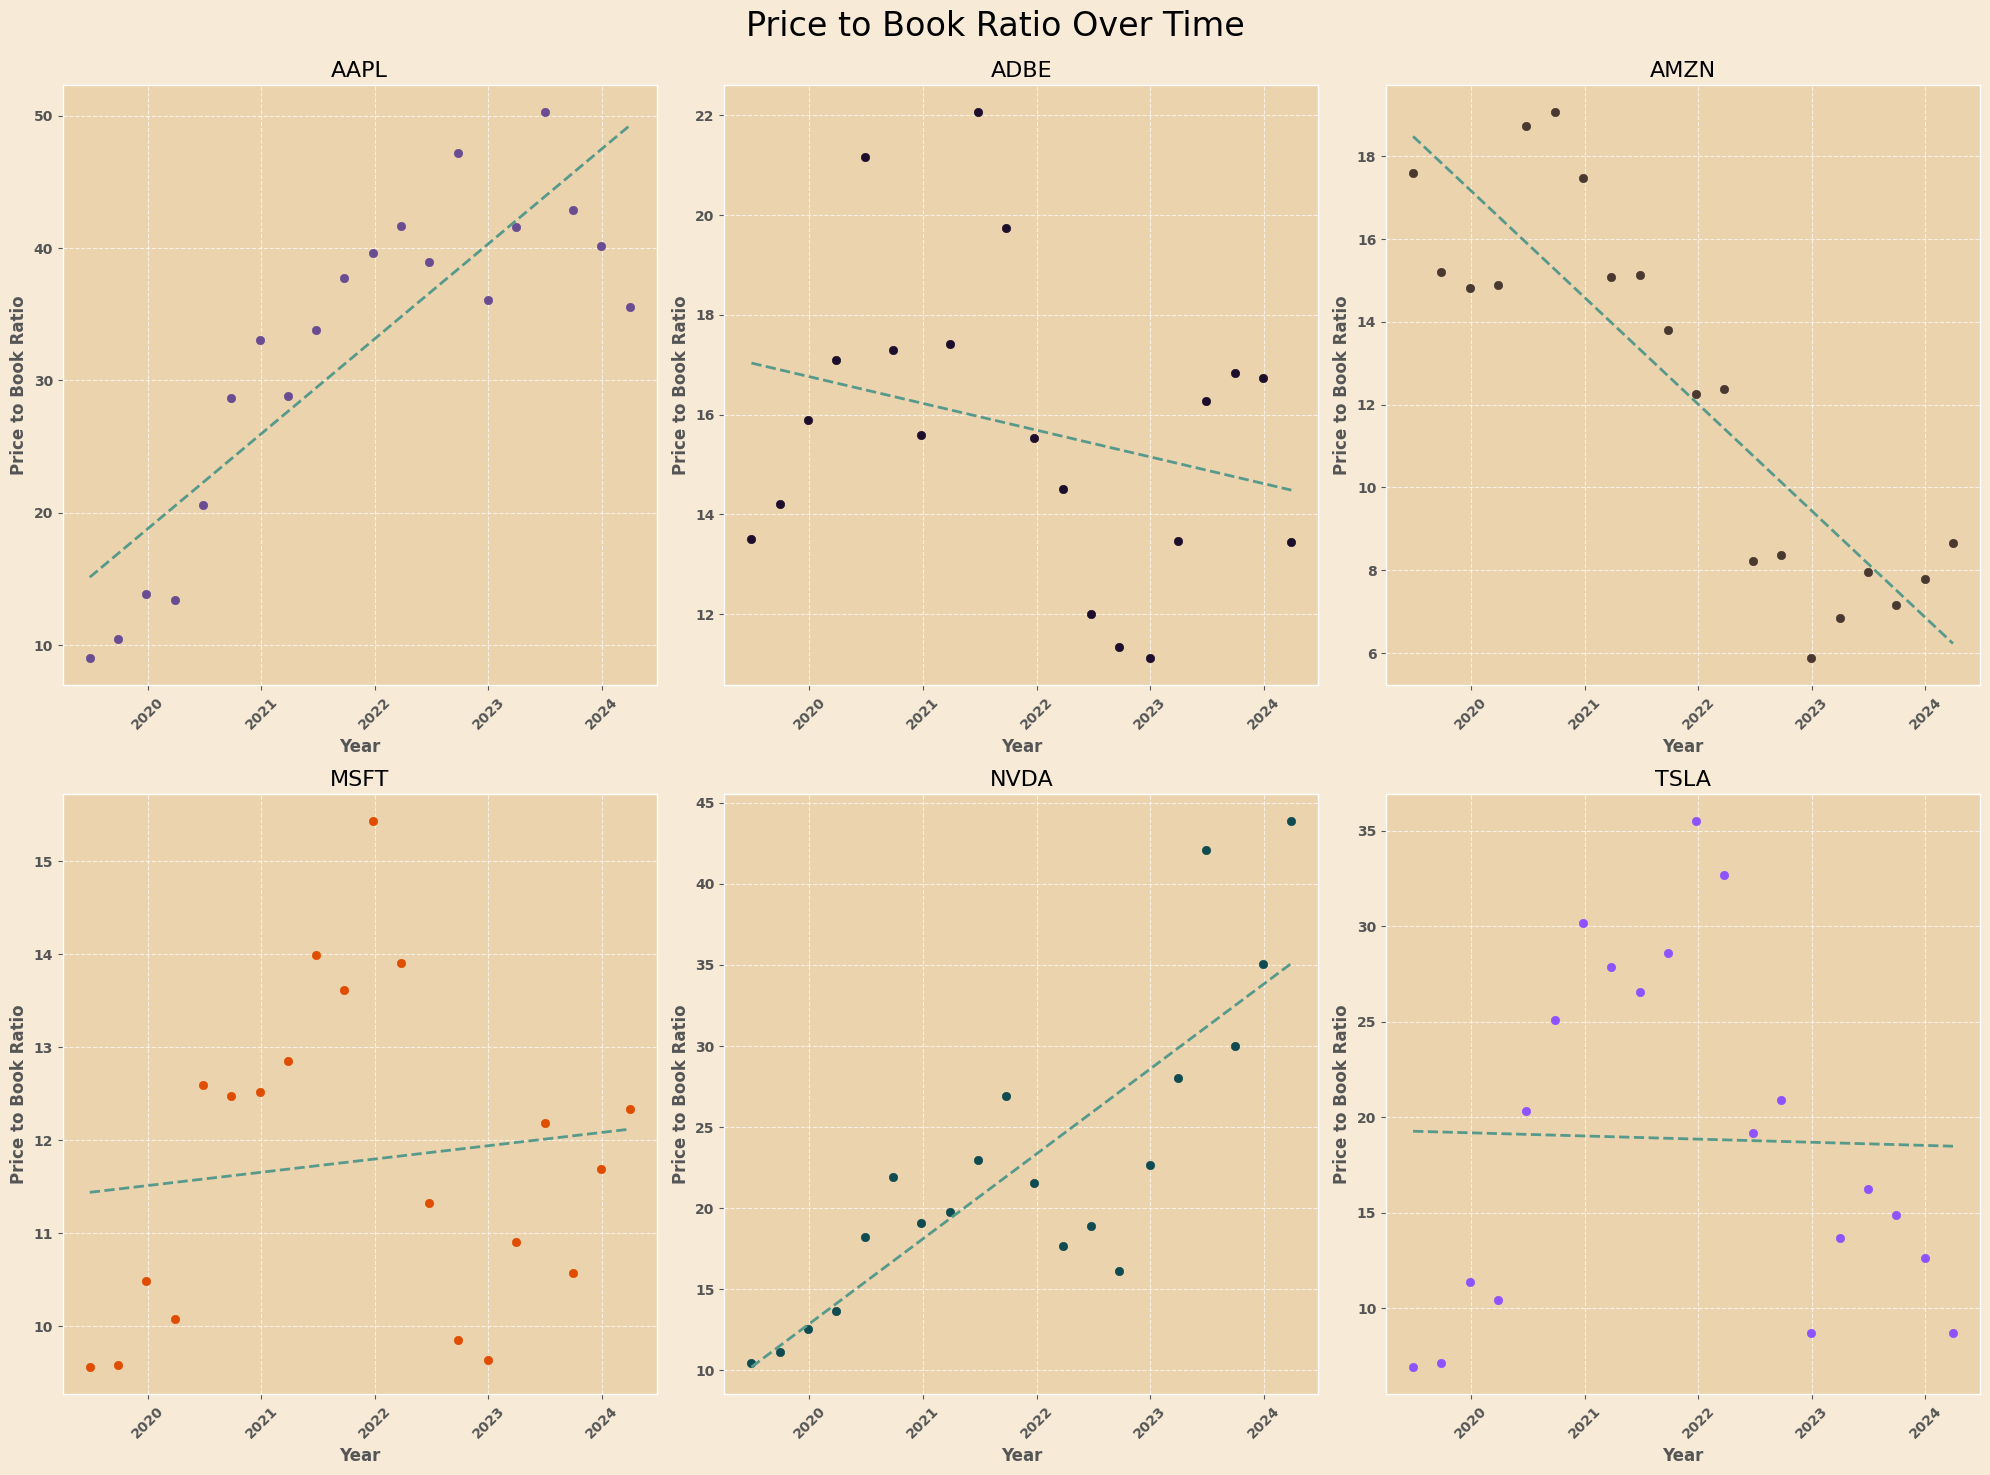

In [55]:
# Load the data from the specified sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=6)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Custom formatter function
def custom_formatter(x, pos):
    if x == int(x):
        return f'{int(x)}'
    else:
        return f'{x:.2f}'

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Price to Book Ratio Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'P/B Ratio {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name], color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna()
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('Price to Book Ratio', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
       
        # Format y-axis to show actual numbers without trailing zeros
        ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()

#### Conclusion

P/B Ratio < 1: Indicates that the stock is potentially undervalued or the company is facing significant issues. Investors are paying less for the stock than the net asset value on the company's balance sheet.

P/B Ratio > 1: Implies that the stock is potentially overvalued or the market expects high growth. Investors are willing to pay more than the company's net assets are worth.

Market Perception: The P/B ratio is influenced by investor perception and expectations of the company's future performance. A high P/B ratio can indicate high investor confidence in the company's growth potential, while a low P/B ratio might reflect investor concerns or undervaluation.

As shown, TSLA, AMZN, and ADBE still face the same problems. Their stock prices, compared to their book values, are decreasing, and their trendlines continue to decline, indicating a declining stock price.

### **Return on Equity**

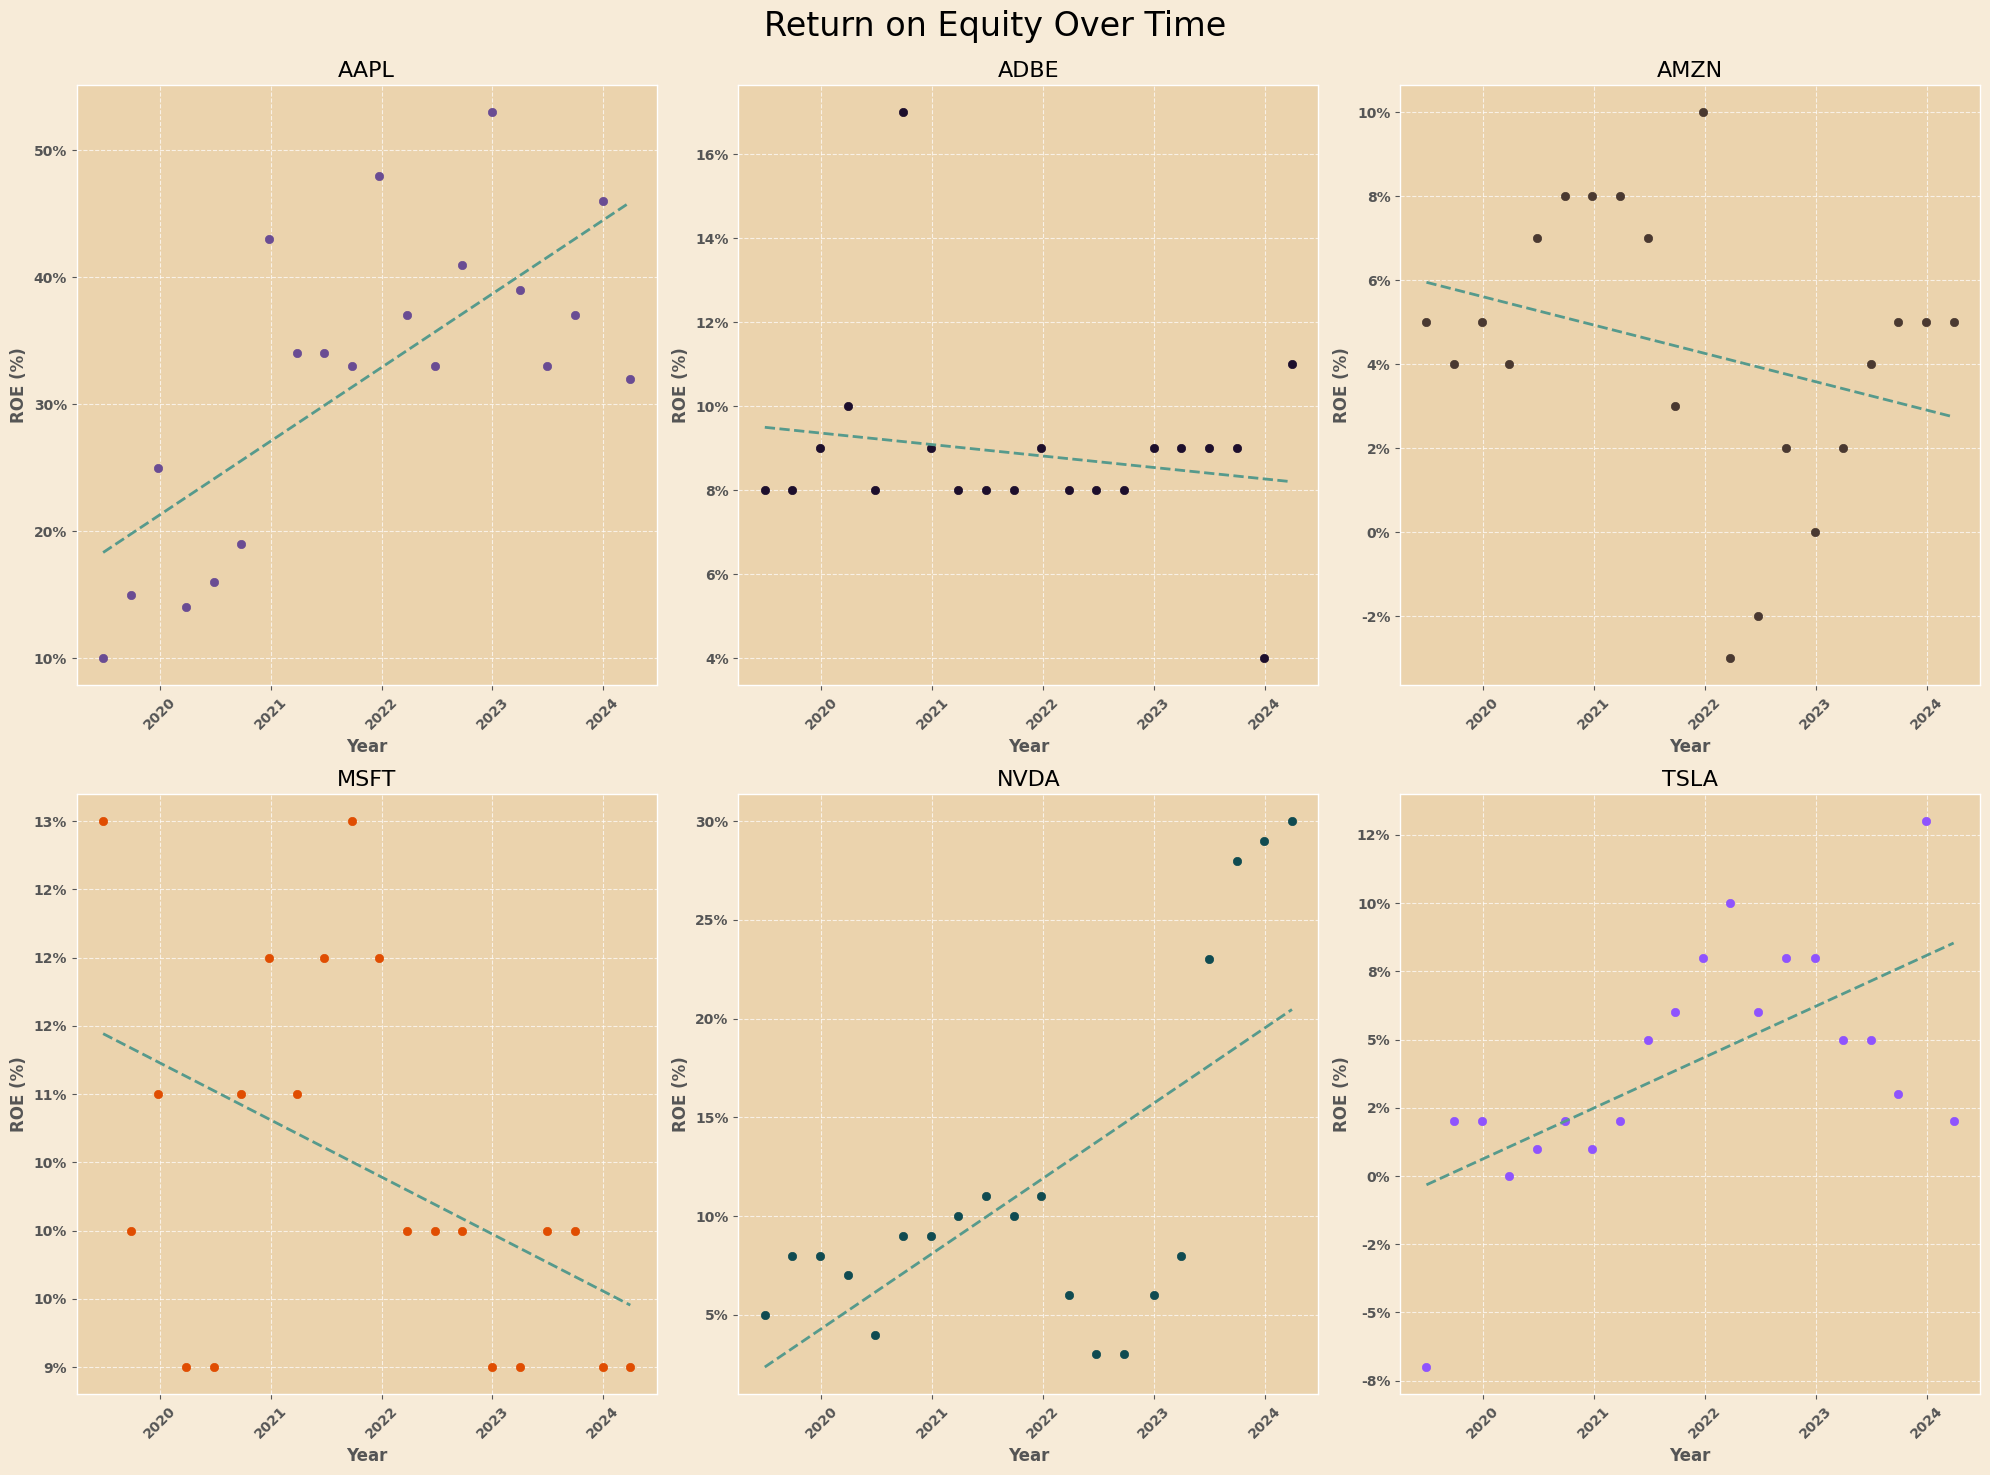

In [57]:
# Load the data from the specified sheet of the Excel file
file_path = 'D:/python/financial_ratios.xlsx'
df = pd.read_excel(file_path, sheet_name=8)  # Sheet indexing starts at 0

# Replace non-breaking spaces with regular spaces in column names
df.columns = [col.replace('\xa0', ' ') for col in df.columns]

# Convert 'Quarter Ending' to datetime
df['Quarter Ending'] = pd.to_datetime(df['Quarter Ending'])

# Ensure all ratio columns are numeric, removing percentage signs and converting to floats
for company in ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']:
    column_name = f'ROE {company}'
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.replace('%', '').astype(float)

# Custom formatter function for percentages
def custom_formatter(x, pos):
    return f'{x:.0f}%'

# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Return on Equity Over Time', fontsize=24)

# Plot each company's data
companies = ['AAPL', 'ADBE', 'AMZN', 'MSFT', 'NVDA', 'TSLA']
colors = ['#6a4c93', '#1d0e2c', '#4a3931', '#e04d01', '#104b51', '#8f53fe']

for i, (company, color) in enumerate(zip(companies, colors)):
    ax = axs[i // 3, i % 3]
    column_name = f'ROE {company}'
    
    if column_name in df.columns:
        # Plot the actual data as scatter plot
        ax.scatter(df['Quarter Ending'], df[column_name] * 100, color=color, marker='o')
        
        # Calculate and plot the trend line
        x = mdates.date2num(df['Quarter Ending'].dropna())
        y = df[column_name].dropna() * 100
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(df['Quarter Ending'], p(mdates.date2num(df['Quarter Ending'])), color='#569a8c', linestyle='--', linewidth=2)
        
        # Customize each subplot
        ax.set_title(company, fontsize=16)
        ax.set_xlabel('Year', fontsize=12,fontweight='bold')
        ax.set_ylabel('ROE (%)', fontsize=12,fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Make tick labels bold
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')
        
        # Format y-axis to show percentages correctly
        ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)

# Set background color for all axes
for ax in axs.flatten():
    ax.set_facecolor('#ebd3ad')
    
fig.patch.set_facecolor('#f7ebd8')  # Set background color for figure

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top spacing for the main title
plt.show()

#### Conclusion 

Positive Correlation: Generally, there is a positive correlation between ROE and stock price. Companies with higher ROE tend to have higher stock prices because they are more efficient at generating profits with shareholders' equity, which often leads to higher returns for investors.

Earnings Growth: High ROE often translates into higher earnings growth. Investors are willing to pay a premium for companies that can grow their earnings consistently, leading to higher stock prices.
Investor Confidence: High ROE can boost investor confidence in a company's management and future prospects, increasing demand for the stock and driving up its price.

we see a red flag for MSFT. This indicates a downward slope in their ratios, which might lead to a decrease in its stock price.

## Section 4: Q4 Answer 

## Section 5: Q5 Answer 

## Conclusion